# Problem Statement

Surpise Housing has decided to enter Australian Market and has collected dataset from the sales of houses in Australia. 

You are required to model the price of houses with available independent variables. This model will then be used by the management to understand how exactly the prices vary with variables. Further, the model will be a good way to understand the pricing dynamics of a new market.

# Step1 : Reading and Understanding Data

In [708]:
# Importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Advance Linear Regression Models
from sklearn.linear_model import Ridge, Lasso

In [709]:
# Warning

import warnings
warnings.filterwarnings("ignore")

In [710]:
# Display format

pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)
pd.options.display.float_format = '{:2f}'.format

### Reading Data

In [711]:
file_to_read = os.getcwd() + '\\train.csv'
df = pd.read_csv(file_to_read)
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL    65.000000     8450   Pave   NaN      Reg   
1   2          20       RL    80.000000     9600   Pave   NaN      Reg   
2   3          60       RL    68.000000    11250   Pave   NaN      IR1   
3   4          70       RL    60.000000     9550   Pave   NaN      IR1   
4   5          60       RL    84.000000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0  196.000000        Gd        TA      PConc       Gd       TA           No   
1    0.000000        TA        TA     CBlock       Gd       TA           Gd   
2  162.000000        Gd        TA      PConc       Gd       TA           Mn   
3    0.000000        TA        TA     BrkTil       TA       Gd           No   
4  350.000000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [712]:
df.shape

(1460, 81)

Total 1460 rows and 81 columns present in the dataset

In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [714]:
df.describe()

Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
count 1460.000000 1460.000000  1201.000000   1460.000000  1460.000000   
mean   730.500000   56.897260    70.049958  10516.828082     6.099315   
std    421.610009   42.300571    24.284752   9981.264932     1.382997   
min      1.000000   20.000000    21.000000   1300.000000     1.000000   
25%    365.750000   20.000000    59.000000   7553.500000     5.000000   
50%    730.500000   50.000000    69.000000   9478.500000     6.000000   
75%   1095.250000   70.000000    80.000000  11601.500000     7.000000   
max   1460.000000  190.000000   313.000000 215245.000000    10.000000   

       OverallCond   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
count  1460.000000 1460.000000   1460.000000 1452.000000 1460.000000   
mean      5.575342 1971.267808   1984.865753  103.685262  443.639726   
std       1.112799   30.202904     20.645407  181.066207  456.098091   
min       1.000000 1872.000000   1950.000000    0.000000    0.000000   
25%       5.000000 1954.000000   1967.000000    0.000000    0.000000   
50%       5.000000 1973.000000   1994.000000    0.000000  383.500000   
75%       6.000000 2000.000000   2004.000000  166.000000  712.250000   
max       9.000000 2010.000000   2010.000000 1600.000000 5644.000000   

       BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  \
count 1460.000000 1460.000000  1460.000000 1460.000000 1460.000000   
mean    46.549315  567.240411  1057.429452 1162.626712  346.992466   
std    161.319273  441.866955   438.705324  386.587738  436.528436   
min      0.000000    0.000000     0.000000  334.000000    0.000000   
25%      0.000000  223.000000   795.750000  882.000000    0.000000   
50%      0.000000  477.500000   991.500000 1087.000000    0.000000   
75%      0.000000  808.000000  1298.250000 1391.250000  728.000000   
max   1474.000000 2336.000000  6110.000000 4692.000000 2065.000000   

       LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   1460.000000 1460.000000   1460.000000   1460.000000 1460.000000   
mean       5.844521 1515.463699      0.425342      0.057534    1.565068   
std       48.623081  525.480383      0.518911      0.238753    0.550916   
min        0.000000  334.000000      0.000000      0.000000    0.000000   
25%        0.000000 1129.500000      0.000000      0.000000    1.000000   
50%        0.000000 1464.000000      0.000000      0.000000    2.000000   
75%        0.000000 1776.750000      1.000000      0.000000    2.000000   
max      572.000000 5642.000000      3.000000      2.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count 1460.000000   1460.000000   1460.000000   1460.000000 1460.000000   
mean     0.382877      2.866438      1.046575      6.517808    0.613014   
std      0.502885      0.815778      0.220338      1.625393    0.644666   
min      0.000000      0.000000      0.000000      2.000000    0.000000   
25%      0.000000      2.000000      1.000000      5.000000    0.000000   
50%      0.000000      3.000000      1.000000      6.000000    1.000000   
75%      1.000000      3.000000      1.000000      7.000000    1.000000   
max      2.000000      8.000000      3.000000     14.000000    3.000000   

       GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
count  1379.000000 1460.000000 1460.000000 1460.000000  1460.000000   
mean   1978.506164    1.767123  472.980137   94.244521    46.660274   
std      24.689725    0.747315  213.804841  125.338794    66.256028   
min    1900.000000    0.000000    0.000000    0.000000     0.000000   
25%    1961.000000    1.000000  334.500000    0.000000     0.000000   
50%    1980.000000    2.000000  480.000000    0.000000    25.000000   
75%    2002.000000    2.000000  576.000000  168.000000    68.000000   
max    2010.000000    4.000000 1418.000000  857.000000   547.000000   

       EnclosedPorch   3SsnPorch  ScreenPorch    PoolArea      MiscVal  \
count    14

Looking at the data above, it seems MasVnrArea, BsmtFinSF2, 2ndFlrSF, WoodDeckSF, OpenPorchSF, EnclosedPorch, YearRemodAdd, MasVnrArea,BsmtFinSF2, 2ndFlrSF, LowQualFinSF, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, PoolArea, MiscVal  is skewed.
We will analyse the variables more in later sections of this notebook.


Categorizing Columns

In [715]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [716]:
# Categorizing columns for which will make analysis easier

columns_to_ignore = ['Id']
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']


cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', \
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',  \
            'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', \
            'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', \
            'GarageFinish', 'GarageCond', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']


misc_columns = ['GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath']

date_cols = ['YearRemodAdd', 'YearBuilt', 'GarageYrBlt']
date_cols_new = ['MoSold', 'YrSold']

num_cols= ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF' \
           , 'GrLivArea',  'GarageArea' ,'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


target_variable = ['SalePrice']

## Cleaning Data

Check if dataset has null values

In [717]:
missing_values = df.isnull().mean().round(4) * 100
df2 = pd.DataFrame({'colum_name': df.columns, 'missing_percentage': missing_values})
df2[df2['missing_percentage']>0].sort_values(by='missing_percentage', ascending=False)
                   

colum_name  missing_percentage
PoolQC              PoolQC           99.520000
MiscFeature    MiscFeature           96.300000
Alley                Alley           93.770000
Fence                Fence           80.750000
FireplaceQu    FireplaceQu           47.260000
LotFrontage    LotFrontage           17.740000
GarageType      GarageType            5.550000
GarageYrBlt    GarageYrBlt            5.550000
GarageFinish  GarageFinish            5.550000
GarageQual      GarageQual            5.550000
GarageCond      GarageCond            5.550000
BsmtExposure  BsmtExposure            2.600000
BsmtFinType2  BsmtFinType2            2.600000
BsmtFinType1  BsmtFinType1            2.530000
BsmtCond          BsmtCond            2.530000
BsmtQual          BsmtQual            2.530000
MasVnrArea      MasVnrArea            0.550000
MasVnrType      MasVnrType            0.550000
Electrical      Electrical            0.070000

Alley, Fence, PoolQc and MiscFeatures have more than 80% missing data.
FireplaceQu has 47.2% missing values. 
LotFrontage has approx. 17% missing values

## Imputing missing values

In [718]:
# Dropping the columns with 80% missing data

new_df = df.loc[:, df.isnull().mean() < .80]

In [719]:
new_df.shape

(1460, 77)

Reduced number of columns to 77 from 81.

Observing variables to impute missing values

In [720]:
new_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

As per the data dictionary, 'NA' is for no fireplace. Assuming the same thing and imputing missing value with Not Available

In [721]:
new_df['FireplaceQu'] =  new_df['FireplaceQu'].fillna('Not Available')
new_df['FireplaceQu'].unique()

array(['Not Available', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

LotFrontage has 17% missing value. Imputing the missing value with mean

In [722]:
new_df['LotFrontage'] = new_df['LotFrontage'].fillna(new_df['LotFrontage'].mean())

#### Moving on to columns with missing values between 5 to 0.5 %

In [723]:
columns_to_check = ['GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond','BsmtExposure','BsmtFinType2','BsmtFinType2', \
                    'BsmtFinType1', 'BsmtCond','BsmtQual', 'MasVnrType', 'MasVnrArea', 'Electrical']

# first checking columns and then imputing missing values to them

for col in columns_to_check:
    print(f"Columns {col} unique values --> \n {new_df[col].unique()}")

Columns GarageType unique values --> 
 ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Columns GarageYrBlt unique values --> 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
Columns GarageFinish unique values --> 
 ['RFn' 'Unf' 'Fin' nan]
Columns GarageQual unique values --> 
 ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Columns GarageCond unique values --> 
 ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Columns BsmtExposure unique values --> 
 ['No' 'Gd' 'Mn

All of the columns are categorical in nature. Column GarageYrBlt is also categorical but have years as data.


Imputing missing values with another category "OTHER"

In [724]:
columns_to_check.remove('GarageYrBlt')
columns_to_check.remove('MasVnrArea')


for col in columns_to_check:
    new_df[col] = new_df[col].fillna('OTHER')


numeric_cols = ['GarageYrBlt', 'MasVnrArea']

for col in numeric_cols:
    median_value = new_df[col].median()
    new_df[col] = new_df[col].fillna(median_value)

In [725]:
missing_values = new_df.isna().sum()
missing_values = missing_values[missing_values>0]
missing_values

Series([], dtype: int64)

All missing values are handled now. Dropping the columns which are not needed


In [726]:

new_df.drop(columns=columns_to_ignore, axis=1, inplace=True)

## Step 2: Analysing and Visualising Data  
## Univariate Analysis

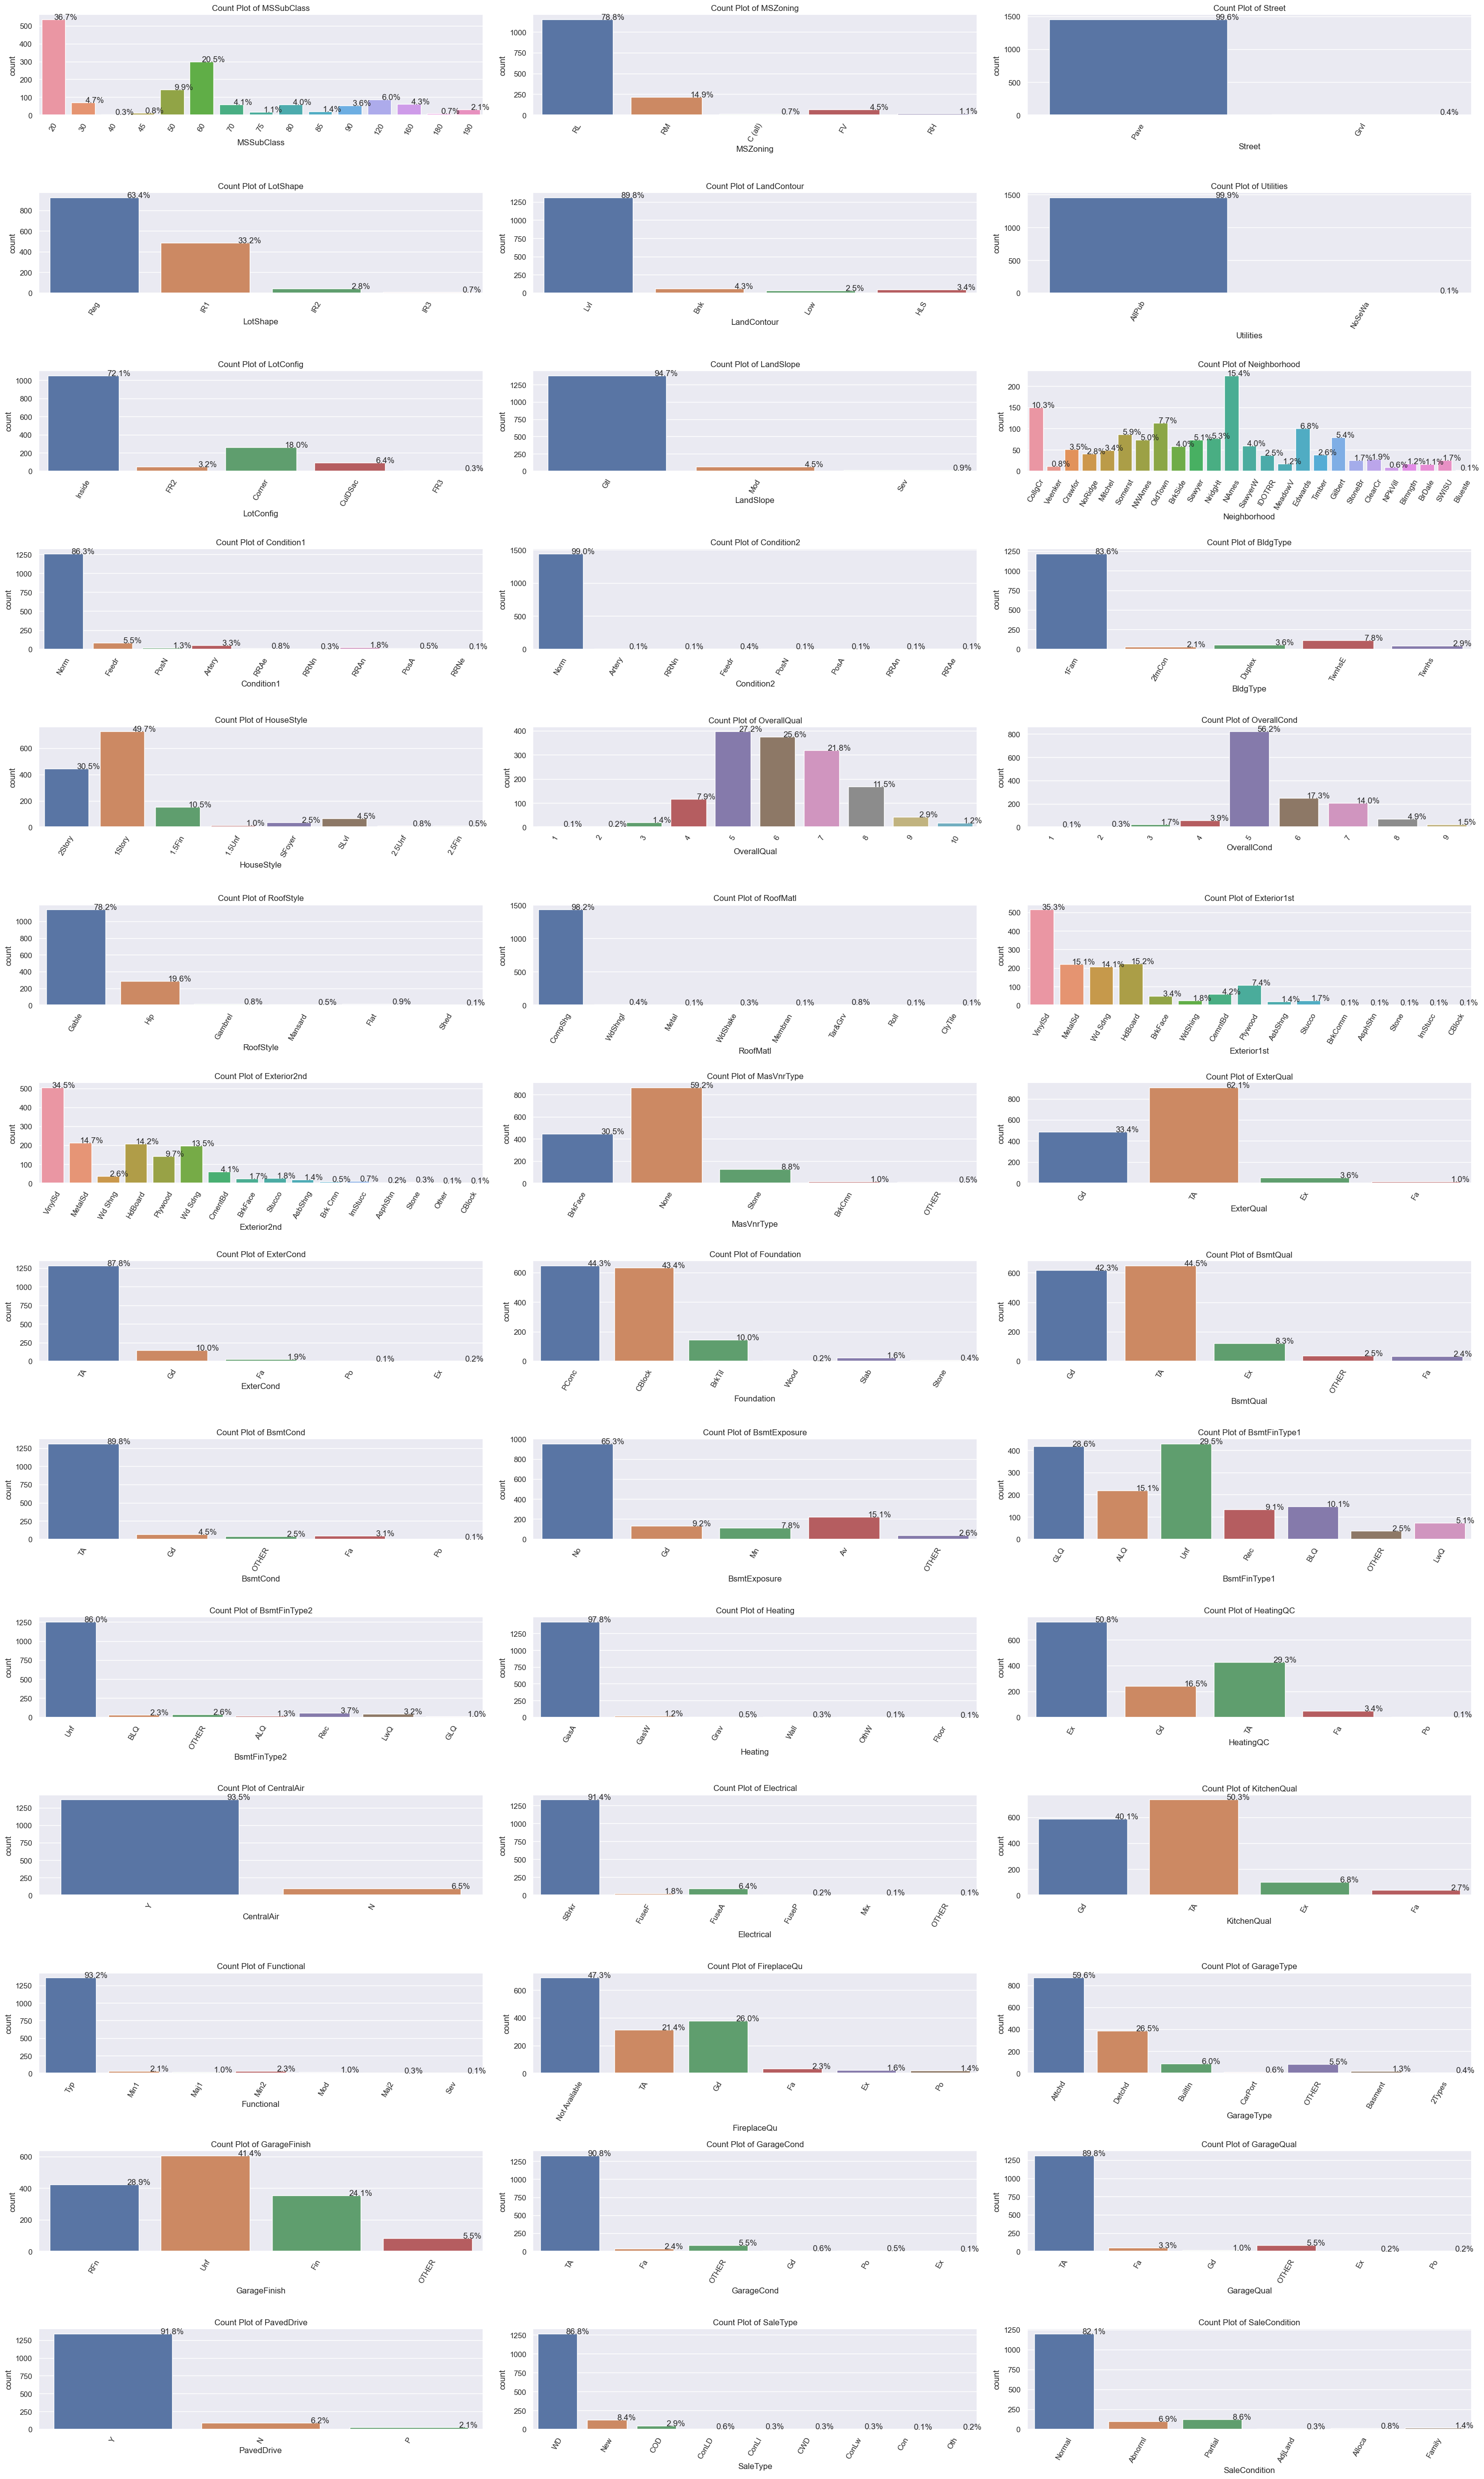

In [727]:
# Univariate Analysis on Categorical columns

plt.figure(figsize=(30,50))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(14, 3, i)
    ax = sns.countplot(new_df[col])
    

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(new_df))
        x = p.get_x() + p.get_width() 
        y = p.get_height()
        
        ax.annotate(percentage, (x, y),ha='center')
        
    plt.title(f'Count Plot of {col}')
    
    
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

#### Insights

Majority of MSSubClass belongs to 1-STORY 1946 & NEWER ALL STYLES. For MSZoning, Residential Low Density property dominates over other types.

- Street:
Majority of Street belongs to paved and regular LotShape. Near Flat/Level dominates for LandContour. 

- Utilities:
In case of utilities, All public Utilities (E,G,W,& S) seems to be dominating compared to other types. Inside Lot Configuration is preferred. Gentle slope dominates for LandSlope.

- Neighbourhood:
Majority of the dataset belongs to North Ames neighbourhood. Nomrmal Proximity to various conditions are dominating. Single-family Detached Building Types outweights compared to other types. 

- House Style:
For house Styles, One story buildings have majority by 49.7%
Majority of the houses are Average Quality which contributes to 27.2% and overally condition being average amounting to 56.7%
Gable Roof Styles contributes heavily to 78.2%
Standard (Composite) Shingle materials have dominance contributing to 98.2%
Majority of exterior covering are Vinyl Siding approx. 35.3%
It seems for Masonry veneer type majority of the datasets is None attributing to 59.2% followed by Brick Common.
Average/Typical materials contributes to majority of quality of the material on the exterior by 62.1% and 87.8% as the present condition of the material on the exterior.
Poured Contrete	is dominating for Foundation Types of the House.

- Basement:
Basements of Good (90-99 inches) and Excellent (100+ inches) have major preference 42.3% and 44.5% respectively.
For basement conditions, Typical - slight dampness allowed contributing to 89.8%
For basement Exposure, No Exposure to walkout or garden level walls are preferred by 65.3%
Unfinshed and Good Living Quarters are contributing for basement finished area by 29.5% and 28.6% respectively.

- Heating Types and Air Conditioning:
for heating types, Gas forced warm air furnace has the majority contributing to 97.8%.
Excellent heating quality and condition contributes heavily by 50.8%
Central air conditioning is required contributing to 93.5%
Standard Circuit Breakers & Romex isd required as Electrical system by 91.4%

- Kitchen Quality
Typical/Average and Good Kitchen Quality is preferred.

- Fireplace:
for Fireplace, data dominates for the ones not present followed by Masonry Fireplace in main level. 

- Garage:
Garage Attached to home dominates the data heavily by 59.6% along with Unfinished Interior of the Garage by 41.4%
Typical/Average garage Quality  and garage condition is preferred by 89.8% and 90.8% respectively

- Driveway
Paved Driveway is preferred by 91.8%

- Sales:
Warranty Deed - Conventional Sales Type contributed heavily by 86.8%
Normal Sale is preferred by 82.1%

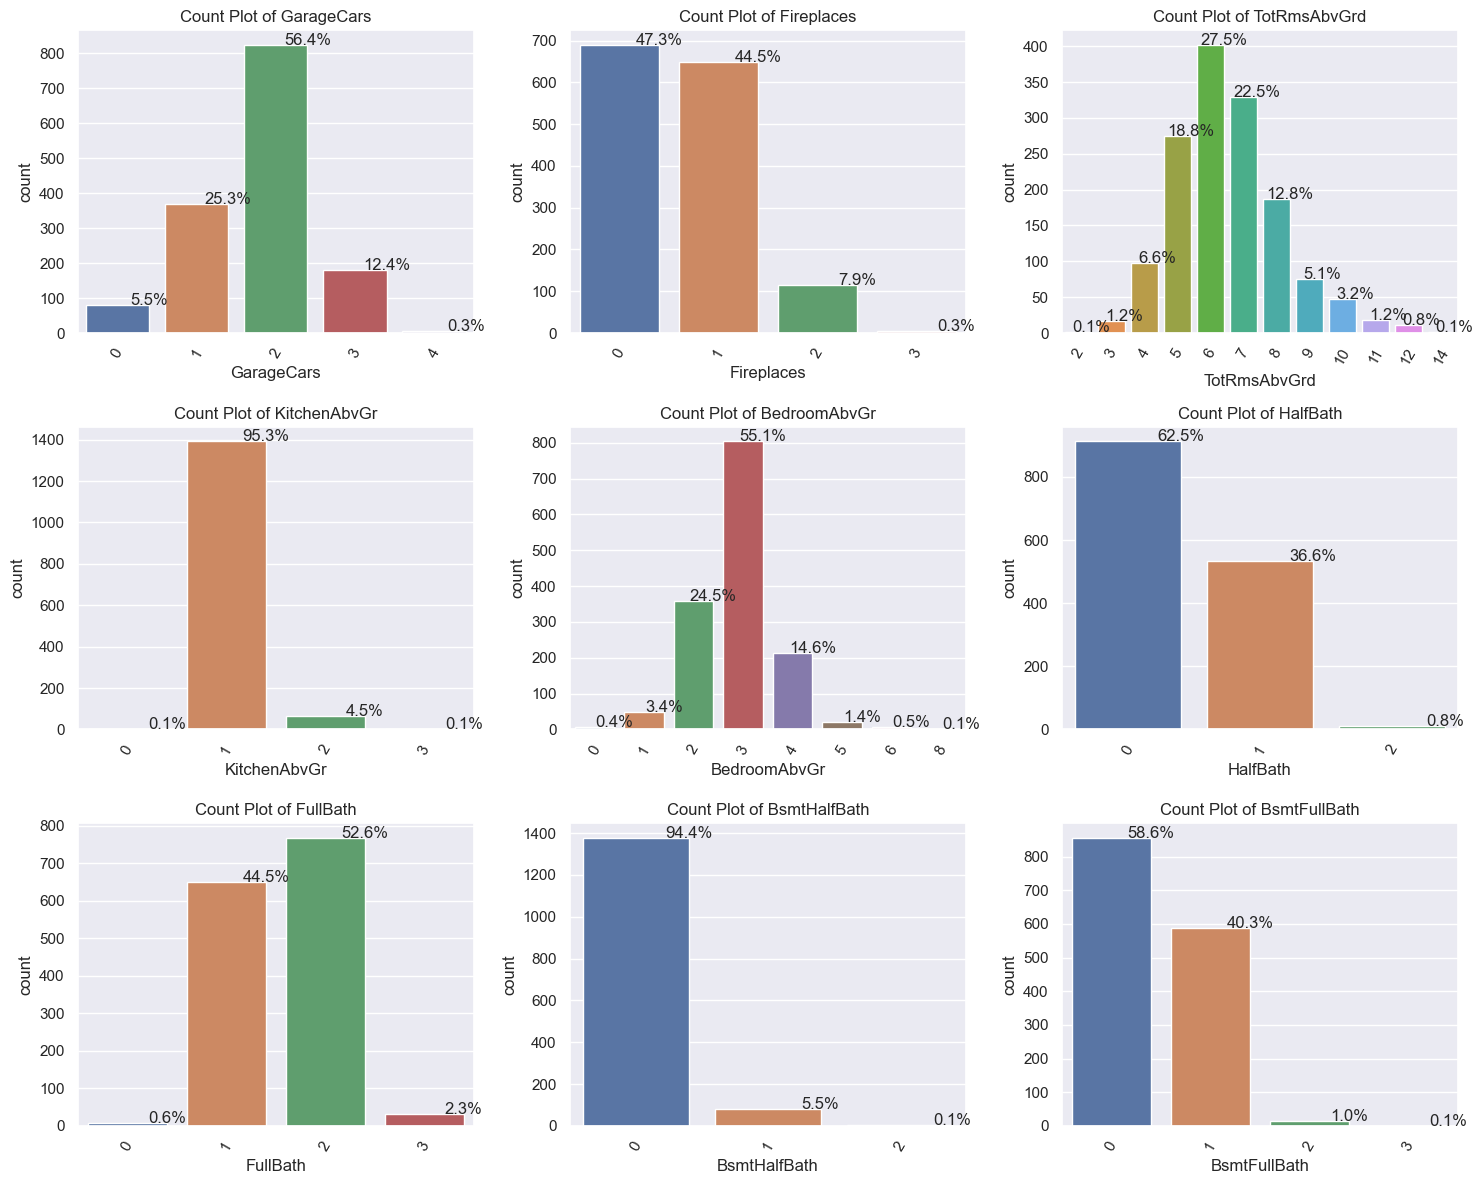

In [728]:
# Univariate Analysis on miscellenous columns

plt.figure(figsize=(15,12))

for i, col in enumerate(misc_columns, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(new_df[col])
    

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(new_df))
        x = p.get_x() + p.get_width() 
        y = p.get_height()
        
        ax.annotate(percentage, (x, y),ha='center')
        
    plt.title(f'Count Plot of {col}')
    # plt.xlabel(col)
    
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

### Insights:

- Garage which are quite spacious and can accomodate 2 cars have higher majority compared to others.
- Majority of the dataset comprises of 0 or 1 Fireplaces contributing to 47.3 and 44.5 % respectively.
-  Approx. 27.% of the data belongs to Houses with 7 rooms
- 95.3% of the data comparises of atleast 1 kitchen above grade.
- Houses with 3 bedrooms above grade accounts to 55.1% of the data
- 0 half bathrooms accounts to 62.5%
- Atleast 1 or 2 full bathrooms above grade accounts to 55.4 and 52.6 respectively
- 0 Basement half bathrooms accounts to 94.4% 
- Majority of houses are with 0 Basement Full Bath accounting to 58.6%

### Univariate Analysis of numerical columns


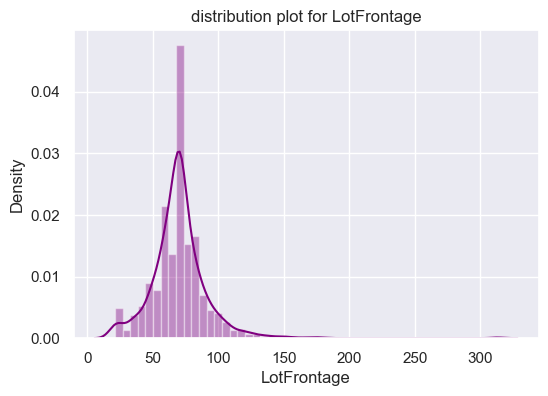

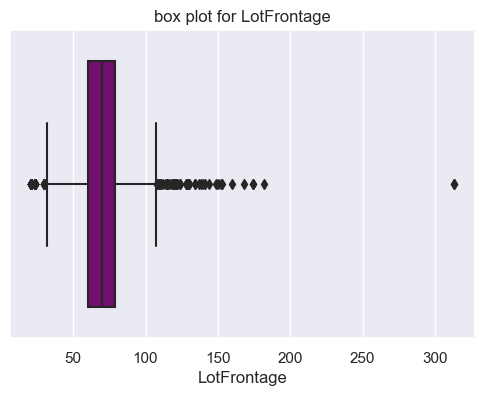

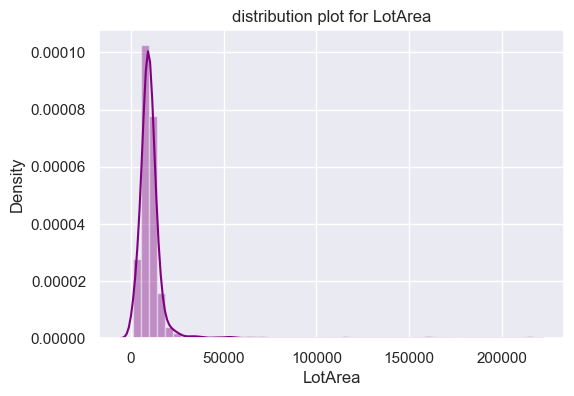

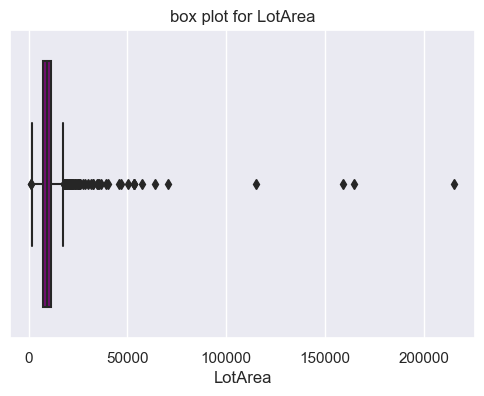

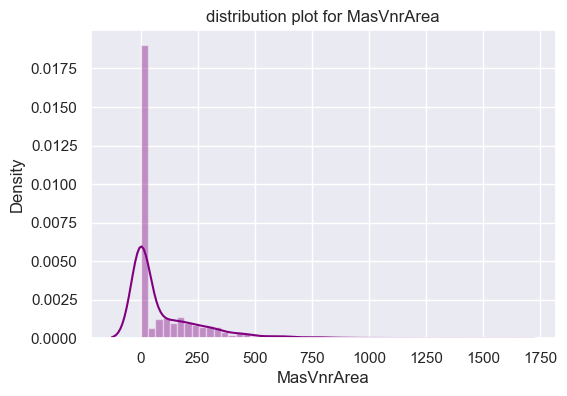

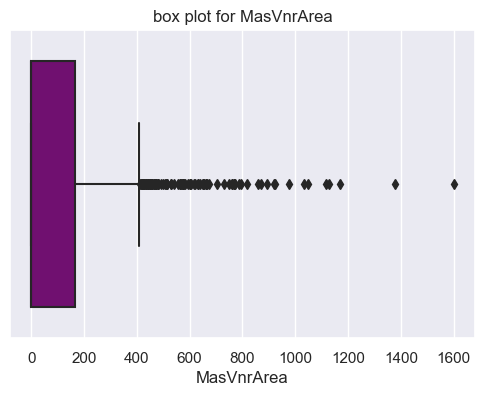

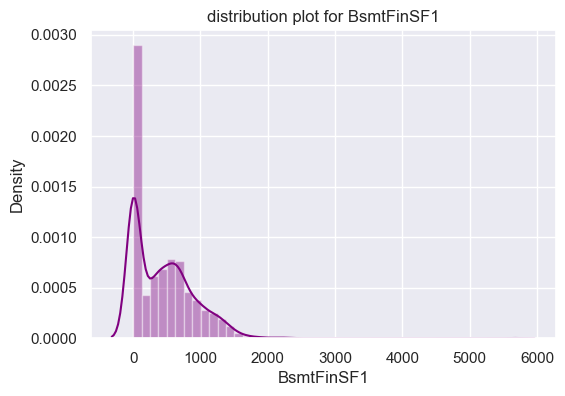

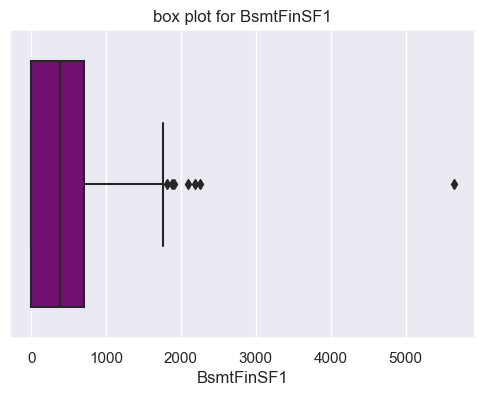

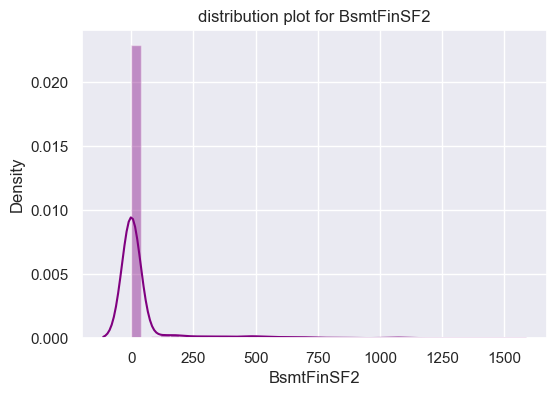

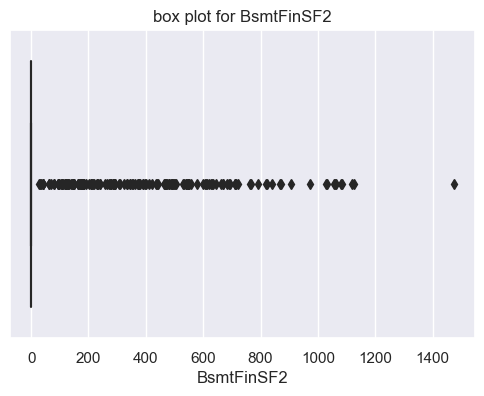

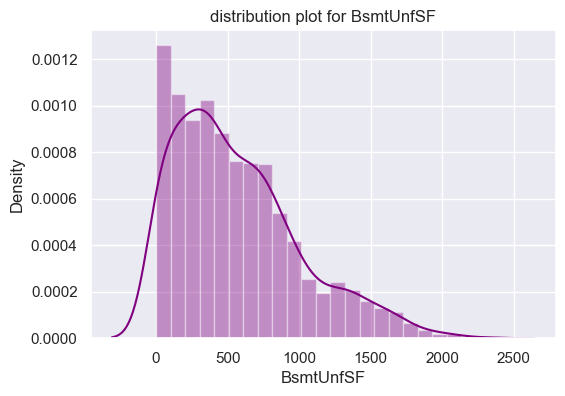

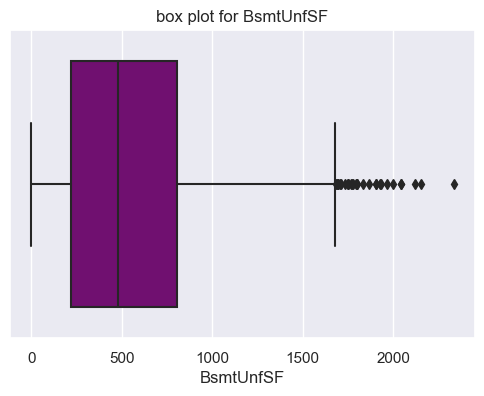

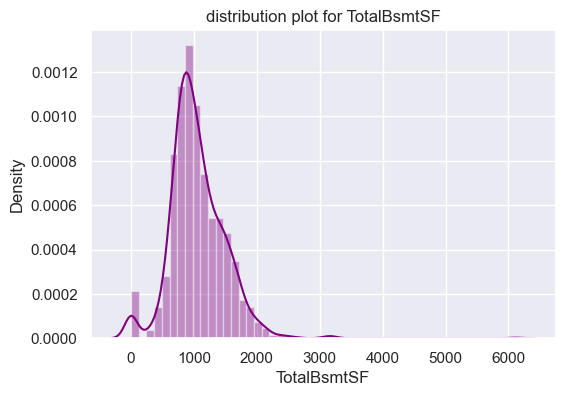

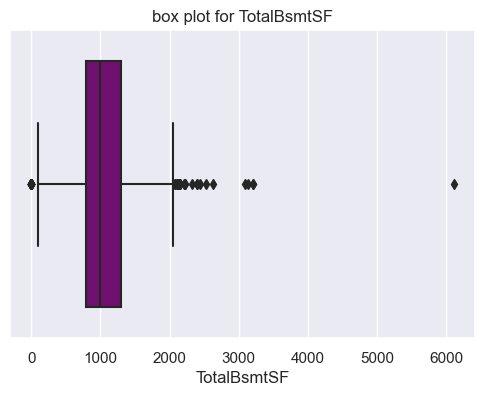

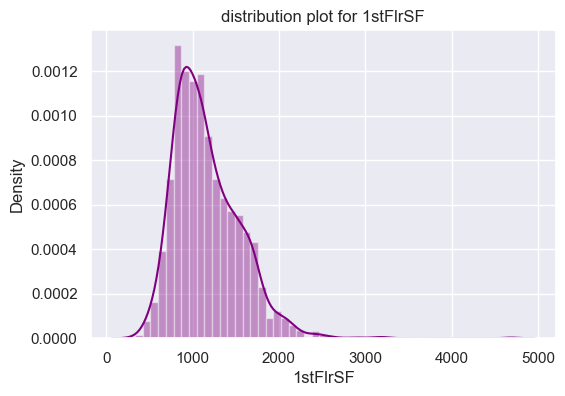

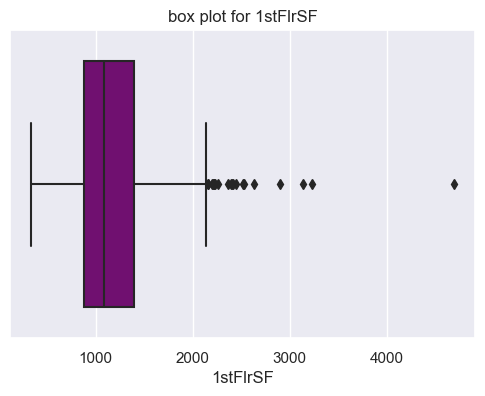

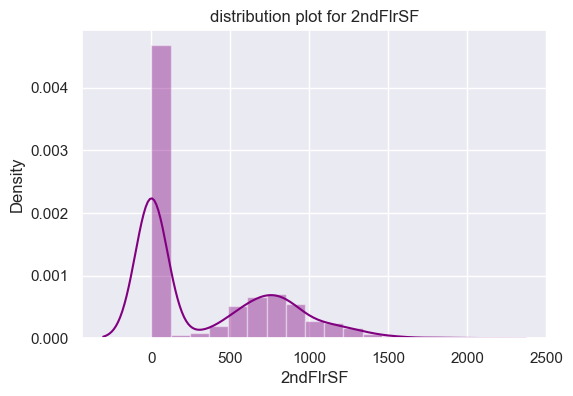

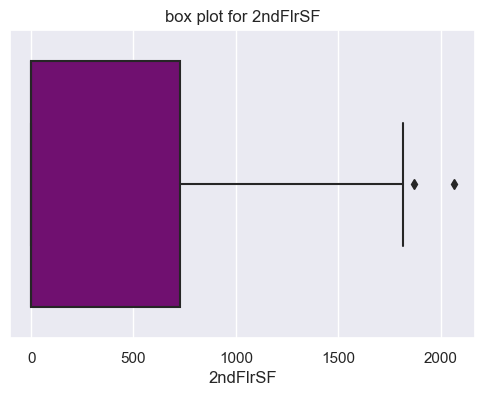

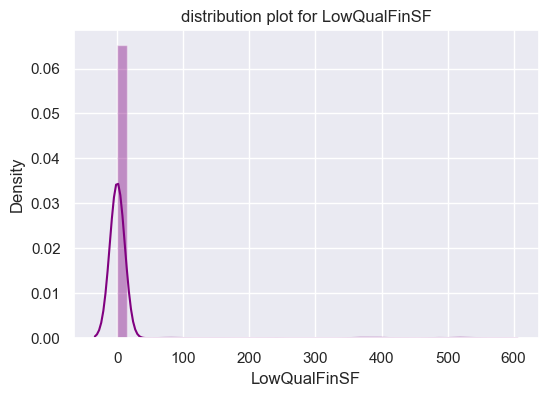

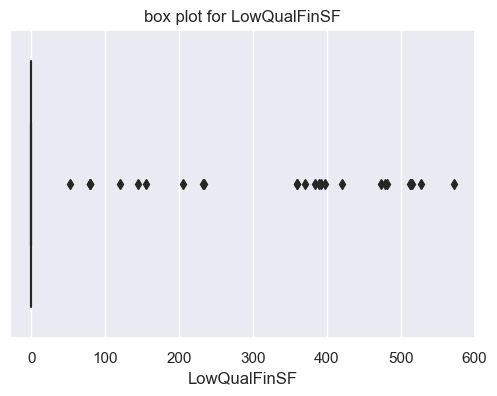

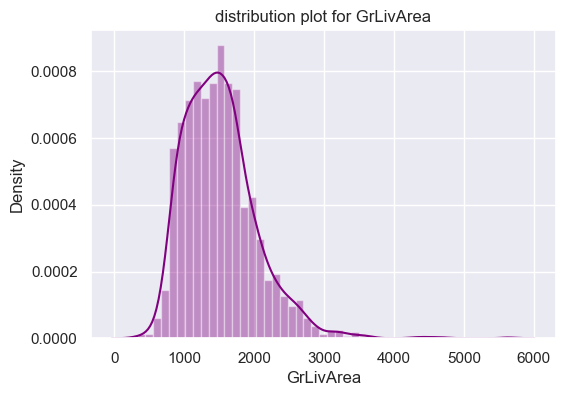

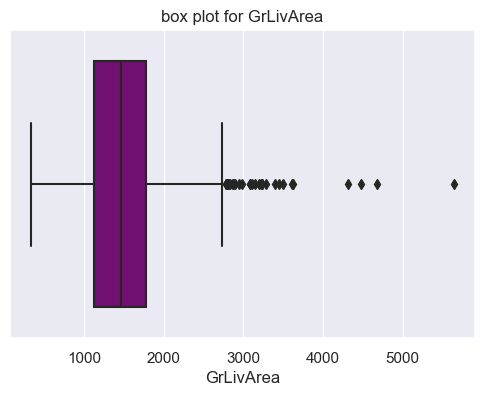

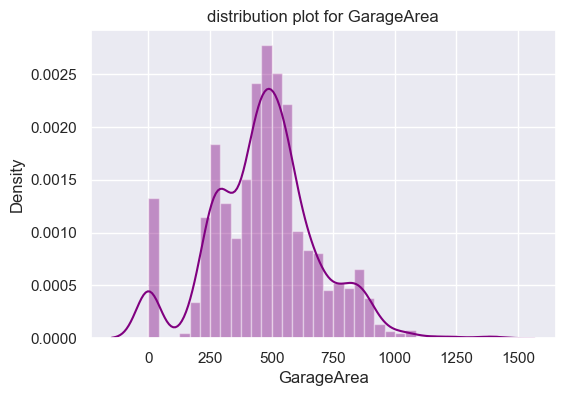

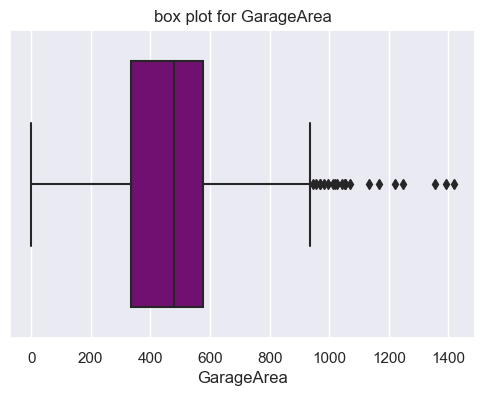

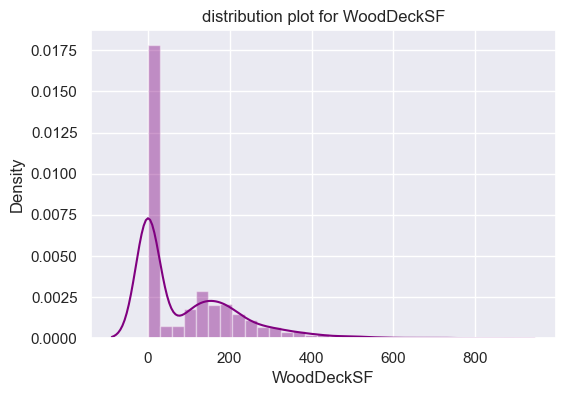

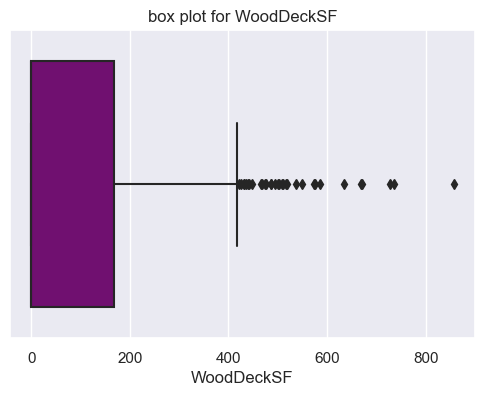

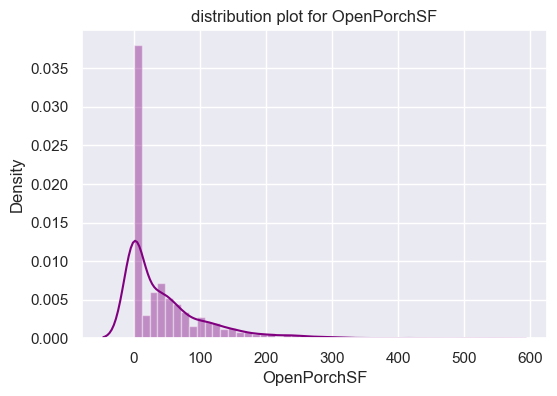

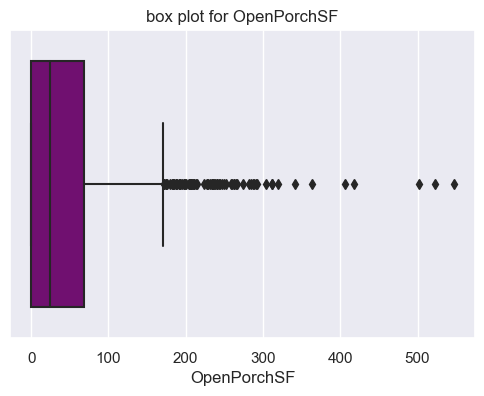

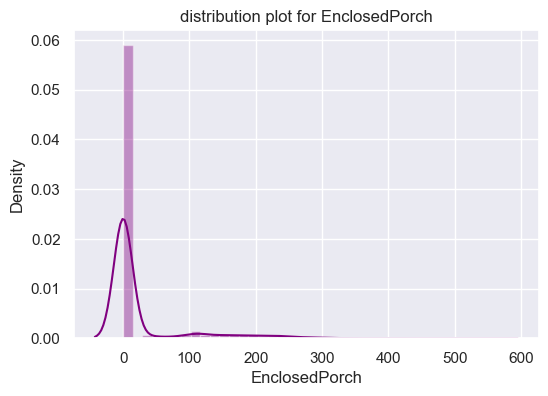

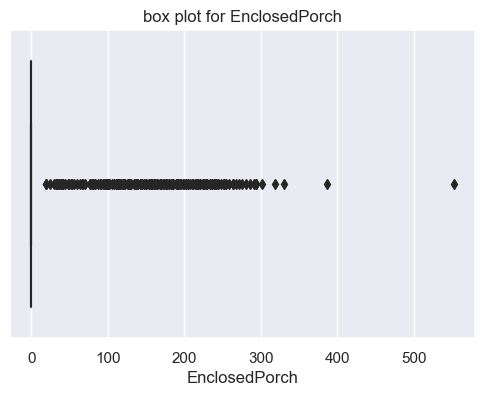

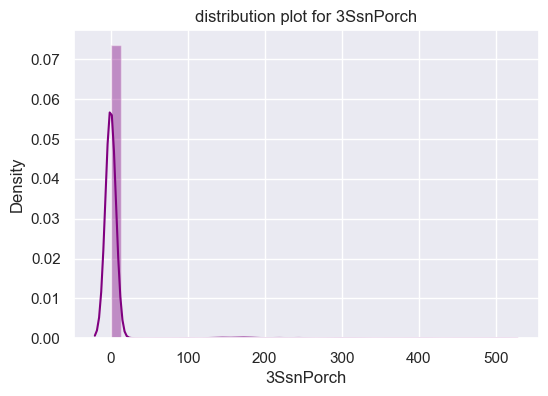

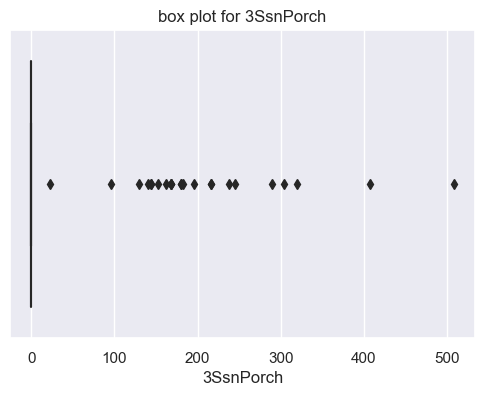

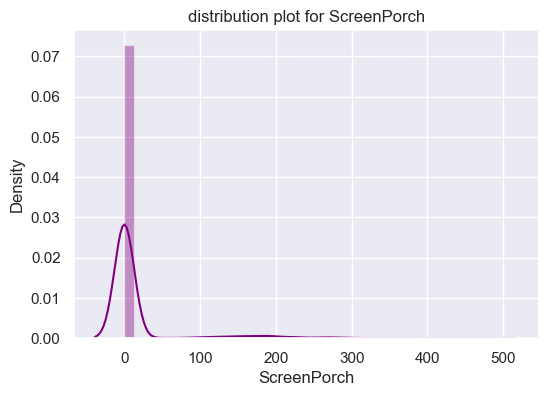

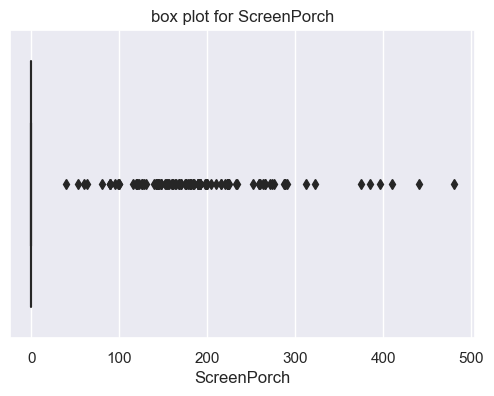

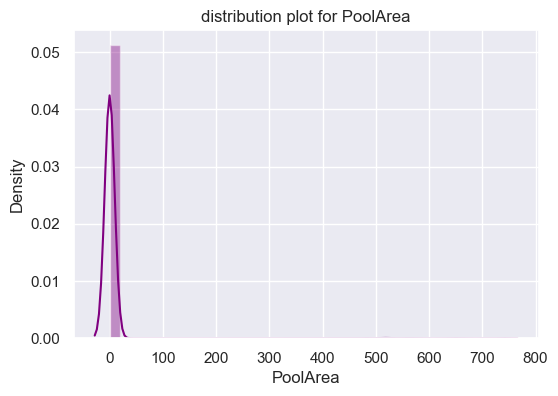

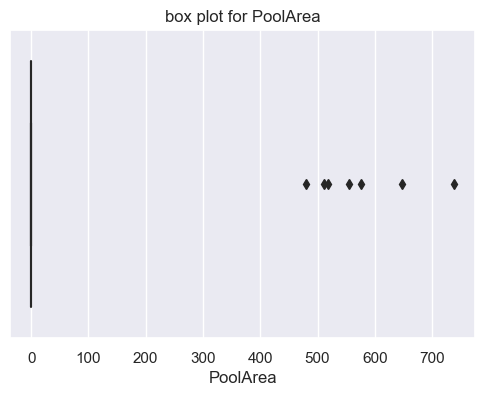

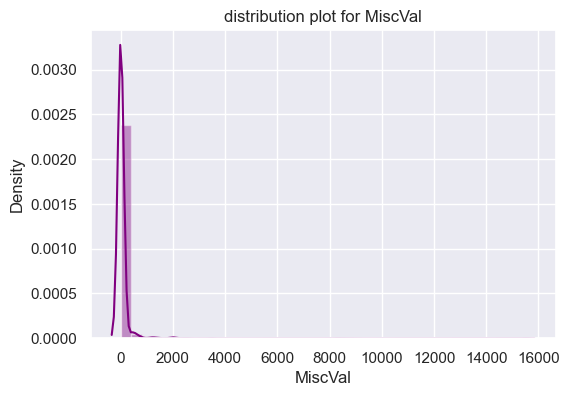

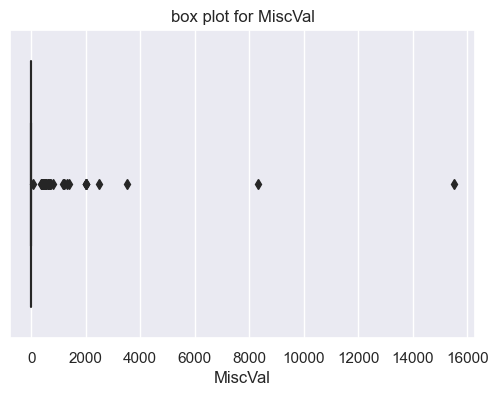

In [729]:
sns.set(rc={'figure.figsize':(6,4)})
for i in num_cols:

    sns.distplot(new_df[i], color='purple').set(title=f"distribution plot for {i}")
    plt.show()
    sns.boxplot(new_df[i], color='purple').set(title=f"box plot for {i}")
    plt.show()

Insights:

Almost all the numerical features have outliers, which we will treat in later sections of the notebook

LotFrontage seems to be normally distributed with approx. median value as 70.
LotArea ,MasVnrArea, BsmntFinSF1 seems to be right skewed 
BsmntUnfSF does not seems to be unfiromly distributed with approx. median value 499.
TotalBsmtSF seems unfiromly distributed but not a perfect normal distribution with approx. median value as 1000
1stFlrSF seems be uniformly distributed
2ndFlrSF is not normally distributed

GrLiveArea is not normally distrbution with median value as 1050
GarageArea is also not normally distrbuted and median value as 500
WoodDeskSF, OpenPorchSF is right skewed and have outliers


Since, the dataset is small hence we are not dropping outliers

LowQualSF, BsmntFinSF2, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal seems to majority value as 0. We will analyse this column later and drop it if required.

In [730]:
cols_for_analysis = ['LowQualFinSF', 'BsmtFinSF2', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

for cols in cols_for_analysis:
    print(f"Column {col} value counts \n  {new_df[cols].value_counts(normalize=True)}")

Column BsmtFullBath value counts 
  0     0.982192
80    0.002055
360   0.001370
205   0.000685
479   0.000685
397   0.000685
514   0.000685
120   0.000685
481   0.000685
232   0.000685
53    0.000685
515   0.000685
156   0.000685
473   0.000685
420   0.000685
390   0.000685
371   0.000685
392   0.000685
144   0.000685
572   0.000685
528   0.000685
234   0.000685
513   0.000685
384   0.000685
Name: LowQualFinSF, dtype: float64
Column BsmtFullBath value counts 
  0      0.885616
180    0.003425
374    0.002055
551    0.001370
147    0.001370
294    0.001370
391    0.001370
539    0.001370
96     0.001370
480    0.001370
182    0.001370
468    0.001370
117    0.001370
64     0.001370
290    0.001370
469    0.001370
279    0.001370
287    0.001370
93     0.001370
712    0.001370
41     0.001370
149    0.000685
1061   0.000685
466    0.000685
396    0.000685
354    0.000685
215    0.000685
841    0.000685
273    0.000685
465    0.000685
400    0.000685
682    0.000685
557    0.000685
230  

Majority of the values in BsmtFullBath is 0 hence this column can be dropped

For LowQualFinSF and BsmtFinSF2 has approx. 88%  and 85% values as 0. We will keep this column 

Approx. 98% of the values in EnclosedPorch is 0 and hence we will be dropping this column

Approx. 92% of the values in 3SsnPorch is 0 and hence we will dropping this column

Approx. 99% of the values in ScreenPorch is 0 and hence we will be dropping this column.

Approx. 96% of the values in PoolArea is 0 and hence we will be dropping this column.

In [731]:
# Bases on above, we will drop following columns

new_columns_to_drop = ['BsmtFullBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

new_df.drop(columns=new_columns_to_drop, axis=1, inplace=True)

In [732]:
new_num_cols = [element for element in num_cols  if element not in new_columns_to_drop]

In [733]:
new_df.shape

(1460, 70)

We dropped a total of 10 columns after initial analysis and there are 71 columns left

## Bivariate  and Multivariate Analysis

In [734]:
new_df.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL    65.000000     8450   Pave      Reg         Lvl   
1          20       RL    80.000000     9600   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace  196.000000        Gd        TA   
1  CompShg     MetalSd     MetalSd       None    0.000000        TA        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   

   TotRmsAbvGrd Functional  Fireplaces    FireplaceQu GarageType  GarageYrBlt  \
0             8        Typ           0  Not Available     Attchd  2003.000000   
1             6        Typ           1             TA     Attchd  1976.000000   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         548         TA         TA          Y   
1          RFn           2         460         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  MoSold  YrSold SaleType SaleCondition  SalePrice  
0           0           61       2    2008       WD        Normal     208500  
1         298            0       5    2007       WD        Normal     181500

In [735]:
# Bivariate Analysis on Categorical Columns

def plot_countplot(col, target_variable='SalePrice'):
    plt.figure(figsize=(5, 5))

    # ax = sns.countplot(new_df, x=col, hue=target_variable)
    ax = sns.barplot(x=col, y=target_variable, data=new_df)
    
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel(f' Sales Price ')
    plt.xticks(rotation=60)

    plt.tight_layout()
    plt.show()

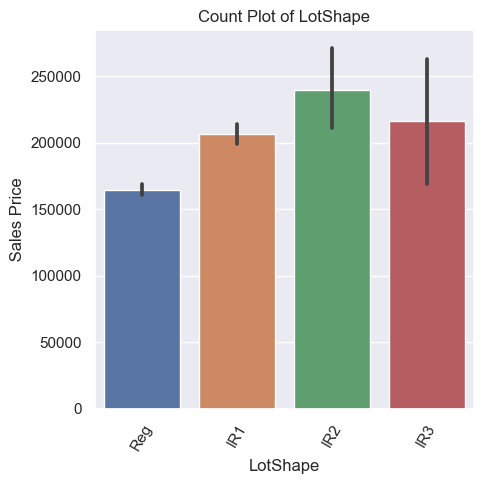

In [736]:
plot_countplot('LotShape')

It seems that Moderately Irregular shape of property has higher price with Regualar shapees bearing lowest price compared to others. 
Customers may purchase Regualar shapes property more as it is cheaper compared to others.

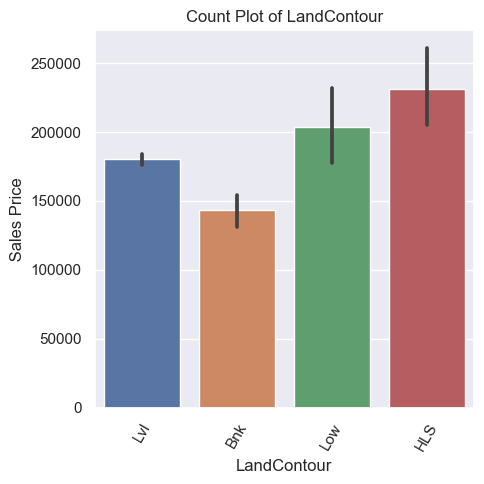

In [737]:
plot_countplot('LandContour')

Hillside - Significant slope from side to side properties bear more cost as it might be more scenic and more efforts required to build the property

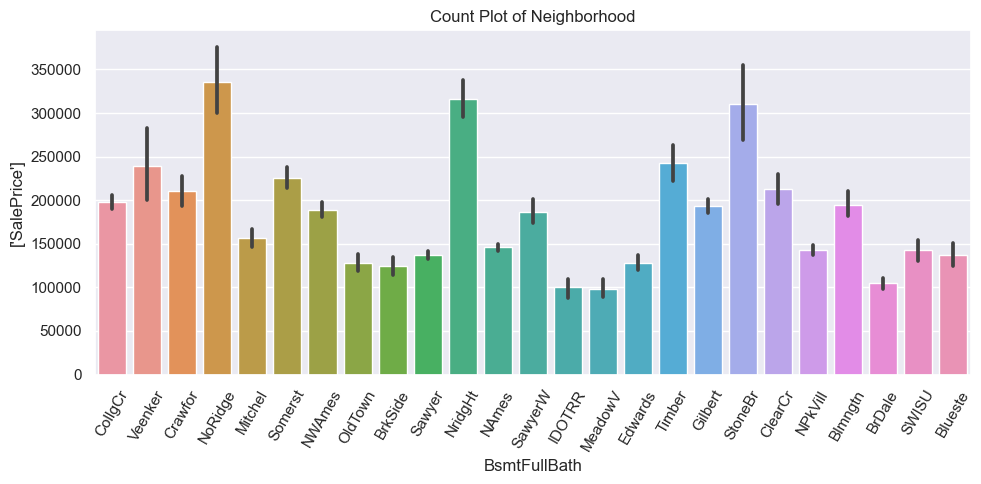

In [738]:
plt.figure(figsize=(10, 5))

    # ax = sns.countplot(new_df, x=col, hue=target_variable)
ax = sns.barplot(x='Neighborhood', y='SalePrice', data=new_df)

plt.title(f'Count Plot of Neighborhood')
plt.xlabel(col)
plt.ylabel(f'{target_variable}')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

Northridge seems to be the posh and costliest neighbourhood. House Prices in the neighborhood are compartively higher compared to others.

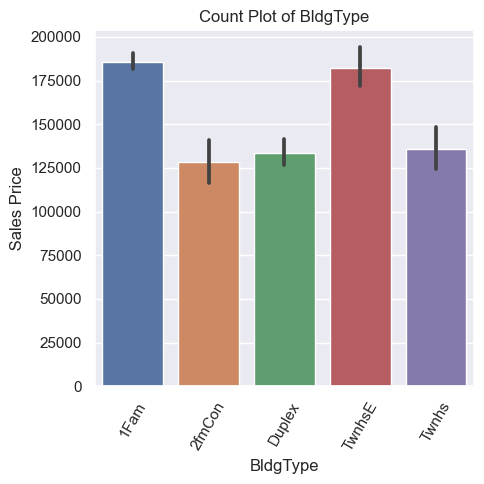

In [739]:
plot_countplot('BldgType')

Single-family Detached and Townhouse End Unit seems to be more costlier compared to others

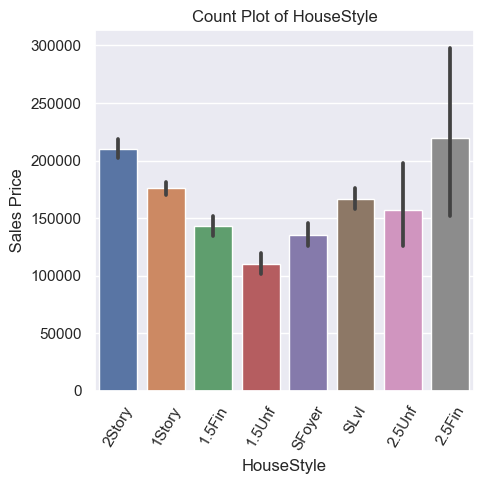

In [740]:
plot_countplot('HouseStyle')

Two story and Two and one-half story: 2nd level finished seems to be costlier as these houses would have more ammenities and carpet area compared to others

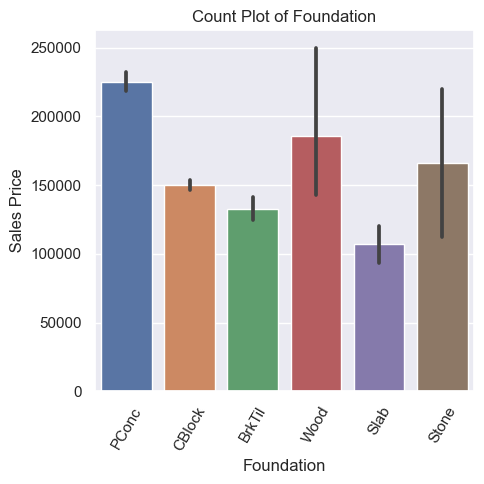

In [741]:
plot_countplot('Foundation')

Houses made of Poured Contrete are costlier compared to others. In Australia, most of the houses are wooden which could be the reason of house with Conctrete are expensive

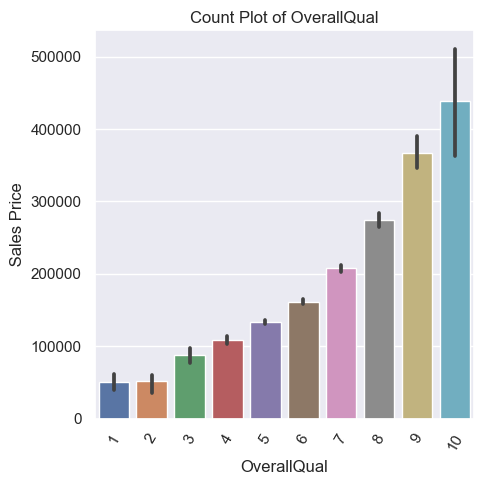

In [742]:
plot_countplot('OverallQual')

Houses with very excellent overall material and finish is the most expensive ones and the price decreases as the overall material and finish qualities degredes.

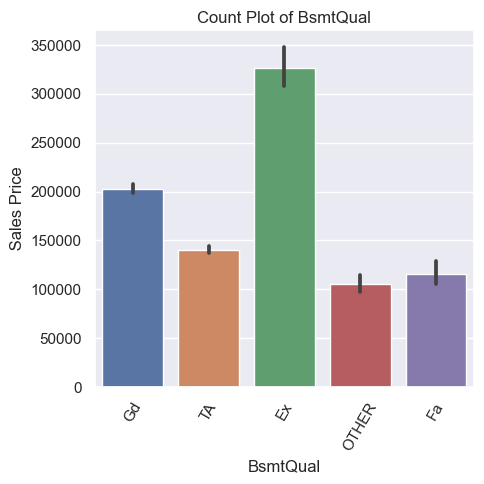

In [743]:
plot_countplot('BsmtQual')

Height of the basement with Excellent (100+ inches)	condition is the most expensive ones, followed by good and average which is pretty much obvious

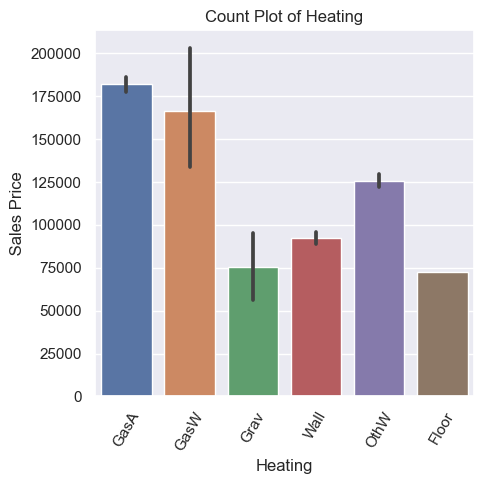

In [744]:
plot_countplot('Heating')

Houses which has Gas forced warm air furnace is the most expensive ones

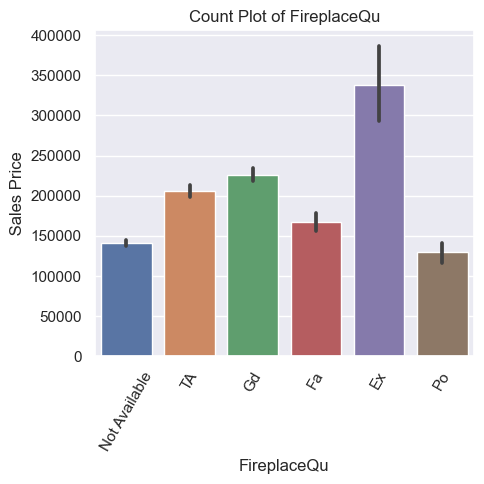

In [745]:
plot_countplot('FireplaceQu')

House with Excellent - Exceptional Masonry Fireplace are the most expensive ones compared to others.

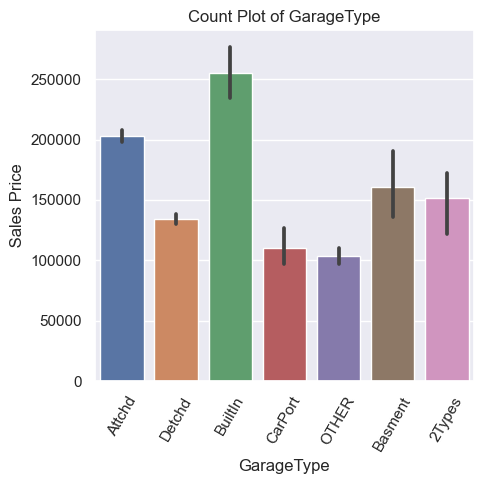

In [746]:
plot_countplot('GarageType')

House with Built-In (Garage part of house - typically has room above garage) are the expensive ones

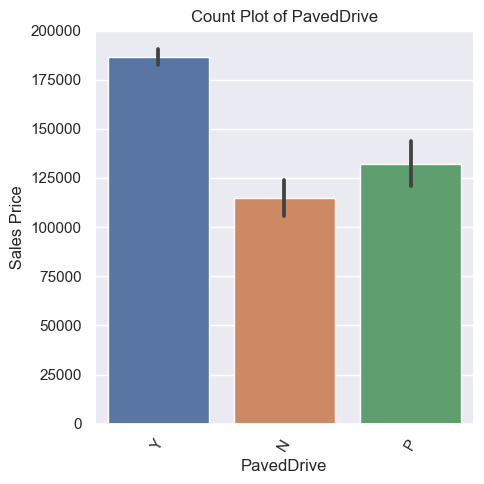

In [747]:
plot_countplot('PavedDrive')

House which has Paved drieway are the expensive ones in Australia

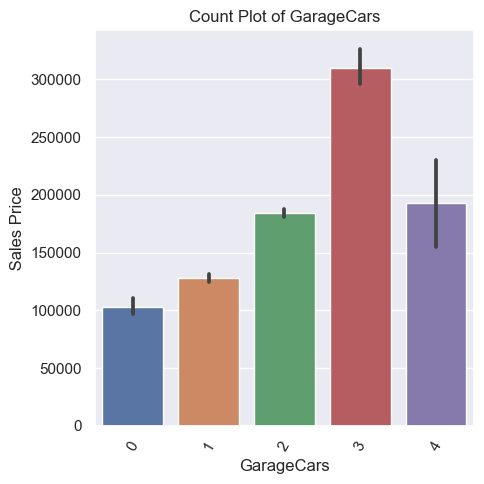

In [748]:
plot_countplot('GarageCars')

Houses which can accomodate 3 cars in the grarage are the most expensive ones as these would be more spacious and would be catgerized as premium or luxious house

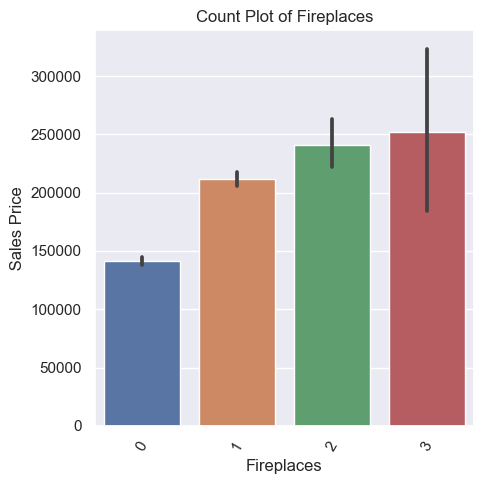

In [749]:
plot_countplot('Fireplaces')

This shows an increasing trend in the prices of the house. As the number of fireplaces increases, prices of the house also increases

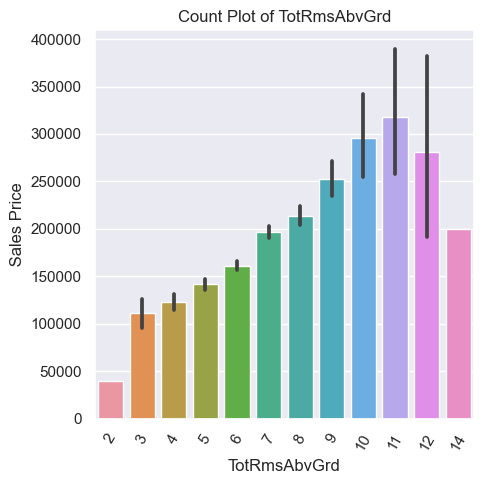

In [750]:
plot_countplot('TotRmsAbvGrd')

This also shows an increasing trend. As the number of rooms above ground increases, houses tend to become costlier,However, houses with 12 to 14 rooms are cheaper as these would be old houses built long time back and thus have lesser market value

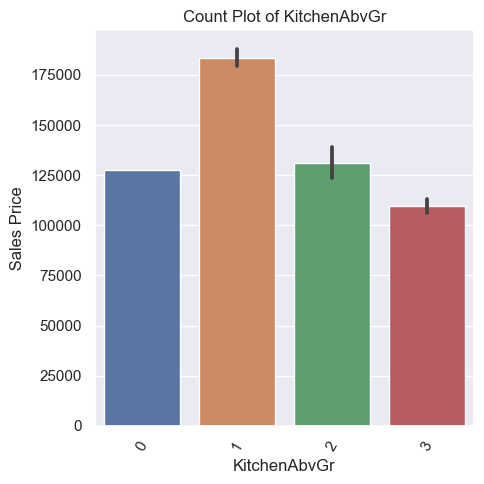

In [751]:
plot_countplot('KitchenAbvGr')

Houses with atleast 1 Kitchen above grade are more expensive compared to others

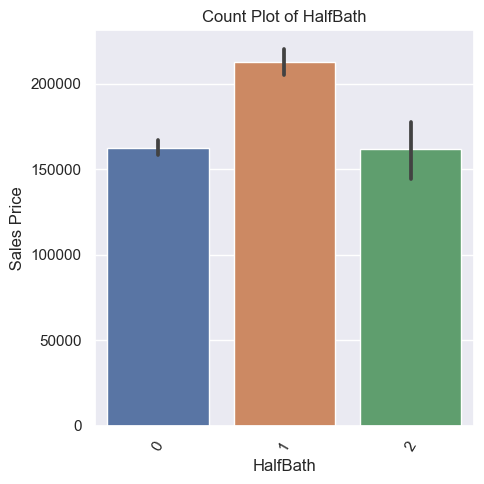

In [752]:
plot_countplot('HalfBath')

Houses with 1 Half baths above grade are expensive compared to others

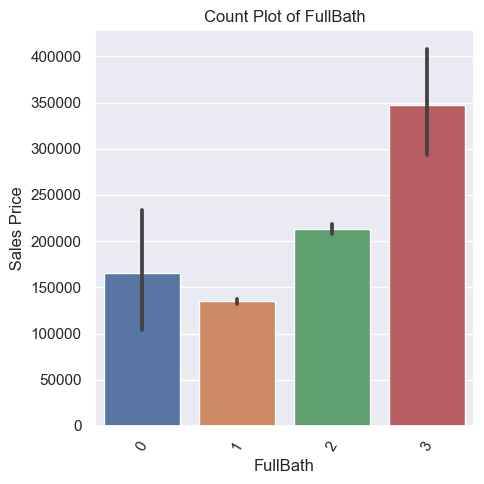

In [753]:
plot_countplot('FullBath')

Houses with 3 Full bathrooms above grade are expensive compared to others and might be put into luxury category

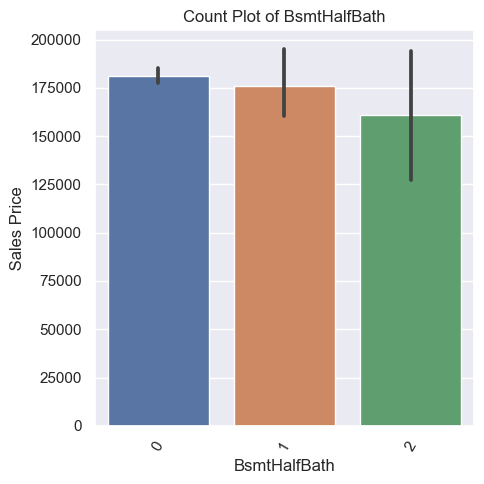

In [754]:
plot_countplot('BsmtHalfBath')

Basement half bathrooms with 0 1 or 2 seems to have equal weightage in the price of the house

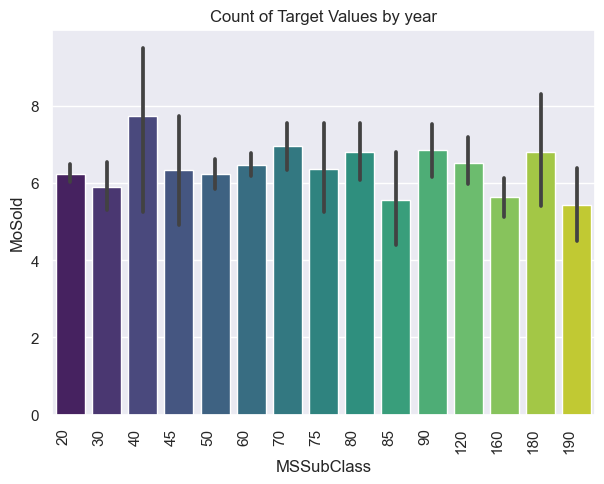

In [755]:

plt.figure(figsize=(7,5))
ax = sns.barplot(data =new_df,x='MSSubClass', y='MoSold', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Target Values by year')
plt.show()

Majority of houses with 1-STORY W/FINISHED ATTIC ALL AGES were sold in August. It could because many immigrant Students would be coming in and renting the 1-Story house in August intake

In [756]:
# Deriving Metrics 
from datetime import date

today = date.today()
current_year = today.strftime("%Y")


new_df['Age_of_Building'] = int(current_year) - new_df['YearBuilt']

new_df['Age_of_Building'].unique()

array([ 21,  48,  23, 109,  24,  31,  20,  51,  93,  85,  59,  19,  62,
        18,  64,  95,  54,  57,  66,  94,  22,  56,  17,  73,  67,  97,
       104,  58,  65,  30,  70,  71,  69,  41,  49,  27,  90,  61,  43,
        60,  25,  52, 103,  79,  42,  26,  68,  76, 114,  29,  33,  15,
        74,  63,  47,  39,  45, 139, 105,  34,  55,  89,  36,  53,  72,
        88, 101, 100,  40,  98,  84,  83,  37,  38,  16, 116, 132, 108,
        92, 106, 112,  77,  99, 124,  44,  35,  32,  75, 144,  96,  46,
       102,  28,  14,  78, 111,  87,  82,  86,  50, 131, 110, 118, 134,
       126, 120, 142, 149, 113, 107, 152, 119], dtype=int64)

Age Of the Building / House derived will help in analysing Sales Prices of the house. 


In [757]:
# Dropping other date columns

total_columns_to_drop = date_cols + date_cols_new

new_df.drop(columns=total_columns_to_drop, axis=1, inplace=True)

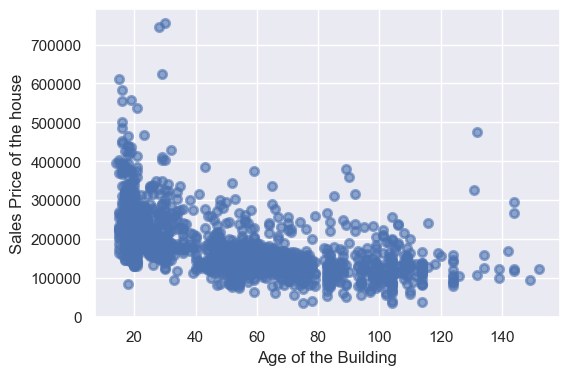

In [758]:


plt.scatter(x=new_df['Age_of_Building'] , y=new_df['SalePrice'],  alpha=0.6, edgecolors='b', linewidths=2)
plt.xlabel("Age of the Building")
plt.ylabel("Sales Price of the house")
plt.show()

As seen from the graph above, newer houses are more expensive compared to older houses which is quite obvious

In [759]:
new_num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

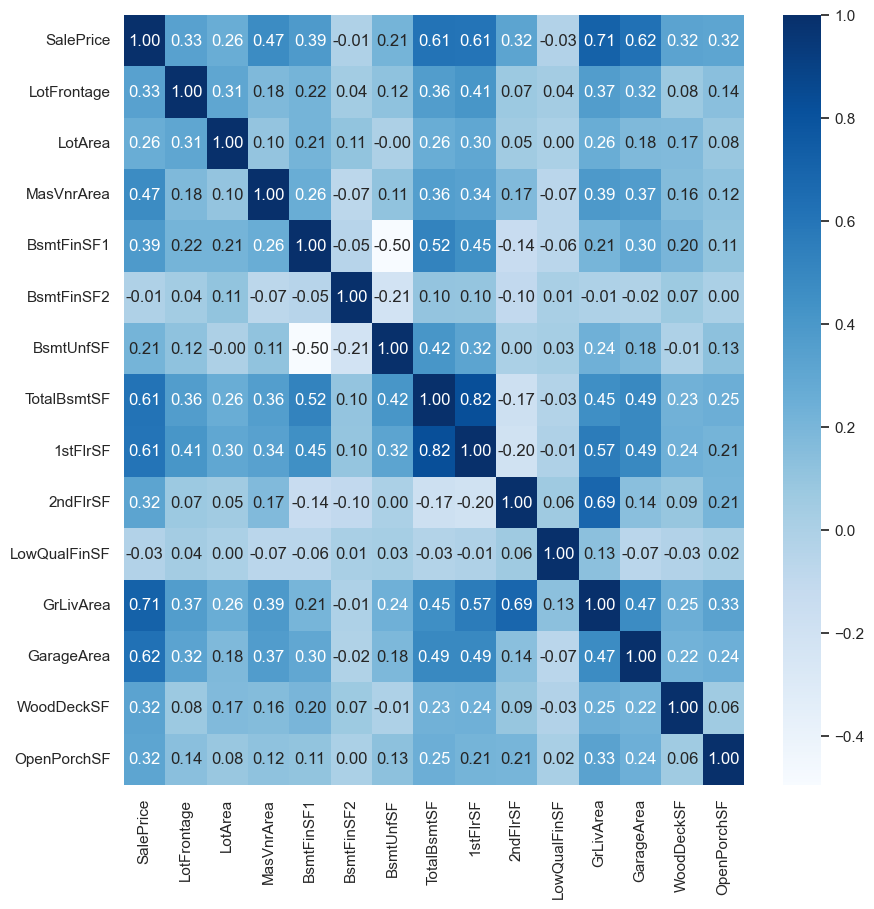

In [760]:
# Correlation Matrix between numerical features

plt.figure(figsize=(10, 10))  # Set the figure size
heatmap = sns.heatmap(new_df[target_variable +new_num_cols].corr(), fmt='0.2f', cmap="Blues", annot=True)
plt.show()

Insights:

GarageArea, GrLivArea, TotalBasmnt, 1stFlrSF , MasVnrArea are highly correlated with Target Variable. Higher the Masonry veneer area , higher the Sale Price of the property. 
Similary, More size of Garage, living area square feet, Total square feet of basement area, First Floor Suqare Feet are the important variable which are the basic qualities depending on which property becomes expensive if those values are high as these might reflect the luxury.

Low quality finished square feet is negatively related to Sales Price, as lower the quality lesser would be the price.

TotalBasmnt and 1stFlrSF are highly correlated which is obvious.
2ndFlrSF and 1stFlrSF are also high correlation. 

GrLivArea and GarageArea are highly correlated. 
2ndFlrSF and GrLivArea are highly correlated. 

There is a high correlation between TotalBsmntSF , 2ndFlrSF and GarageArea which basically suggests that house with more Basement Area or 2nd Floor Area would also have higher GarageArea. 

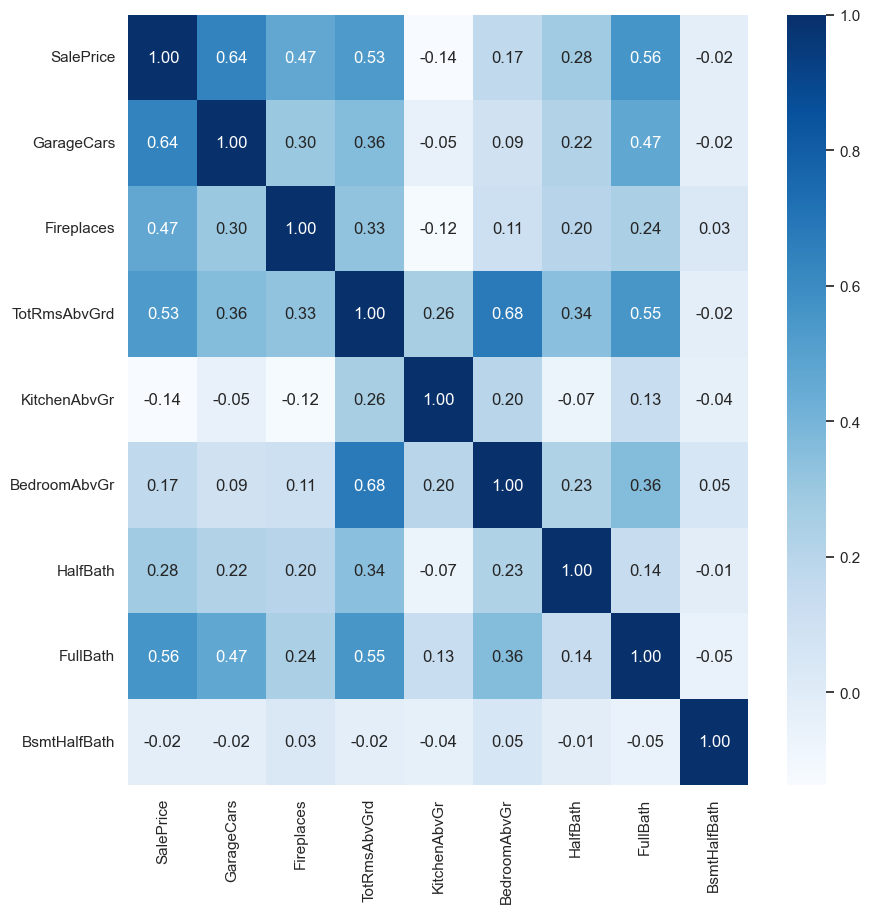

In [761]:
# Correlation Matrix for miscellenous features

misc_columns = ['GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath']
plt.figure(figsize=(10, 10))  # Set the figure size
heatmap = sns.heatmap(new_df[target_variable +misc_columns].corr(), fmt='0.2f', cmap="Blues", annot=True)
plt.show()

Insights:

Garage Cars, Total Rooms Above Ground and Full Bath are highl correlated with Sales Price of the house and can be considered as important variables

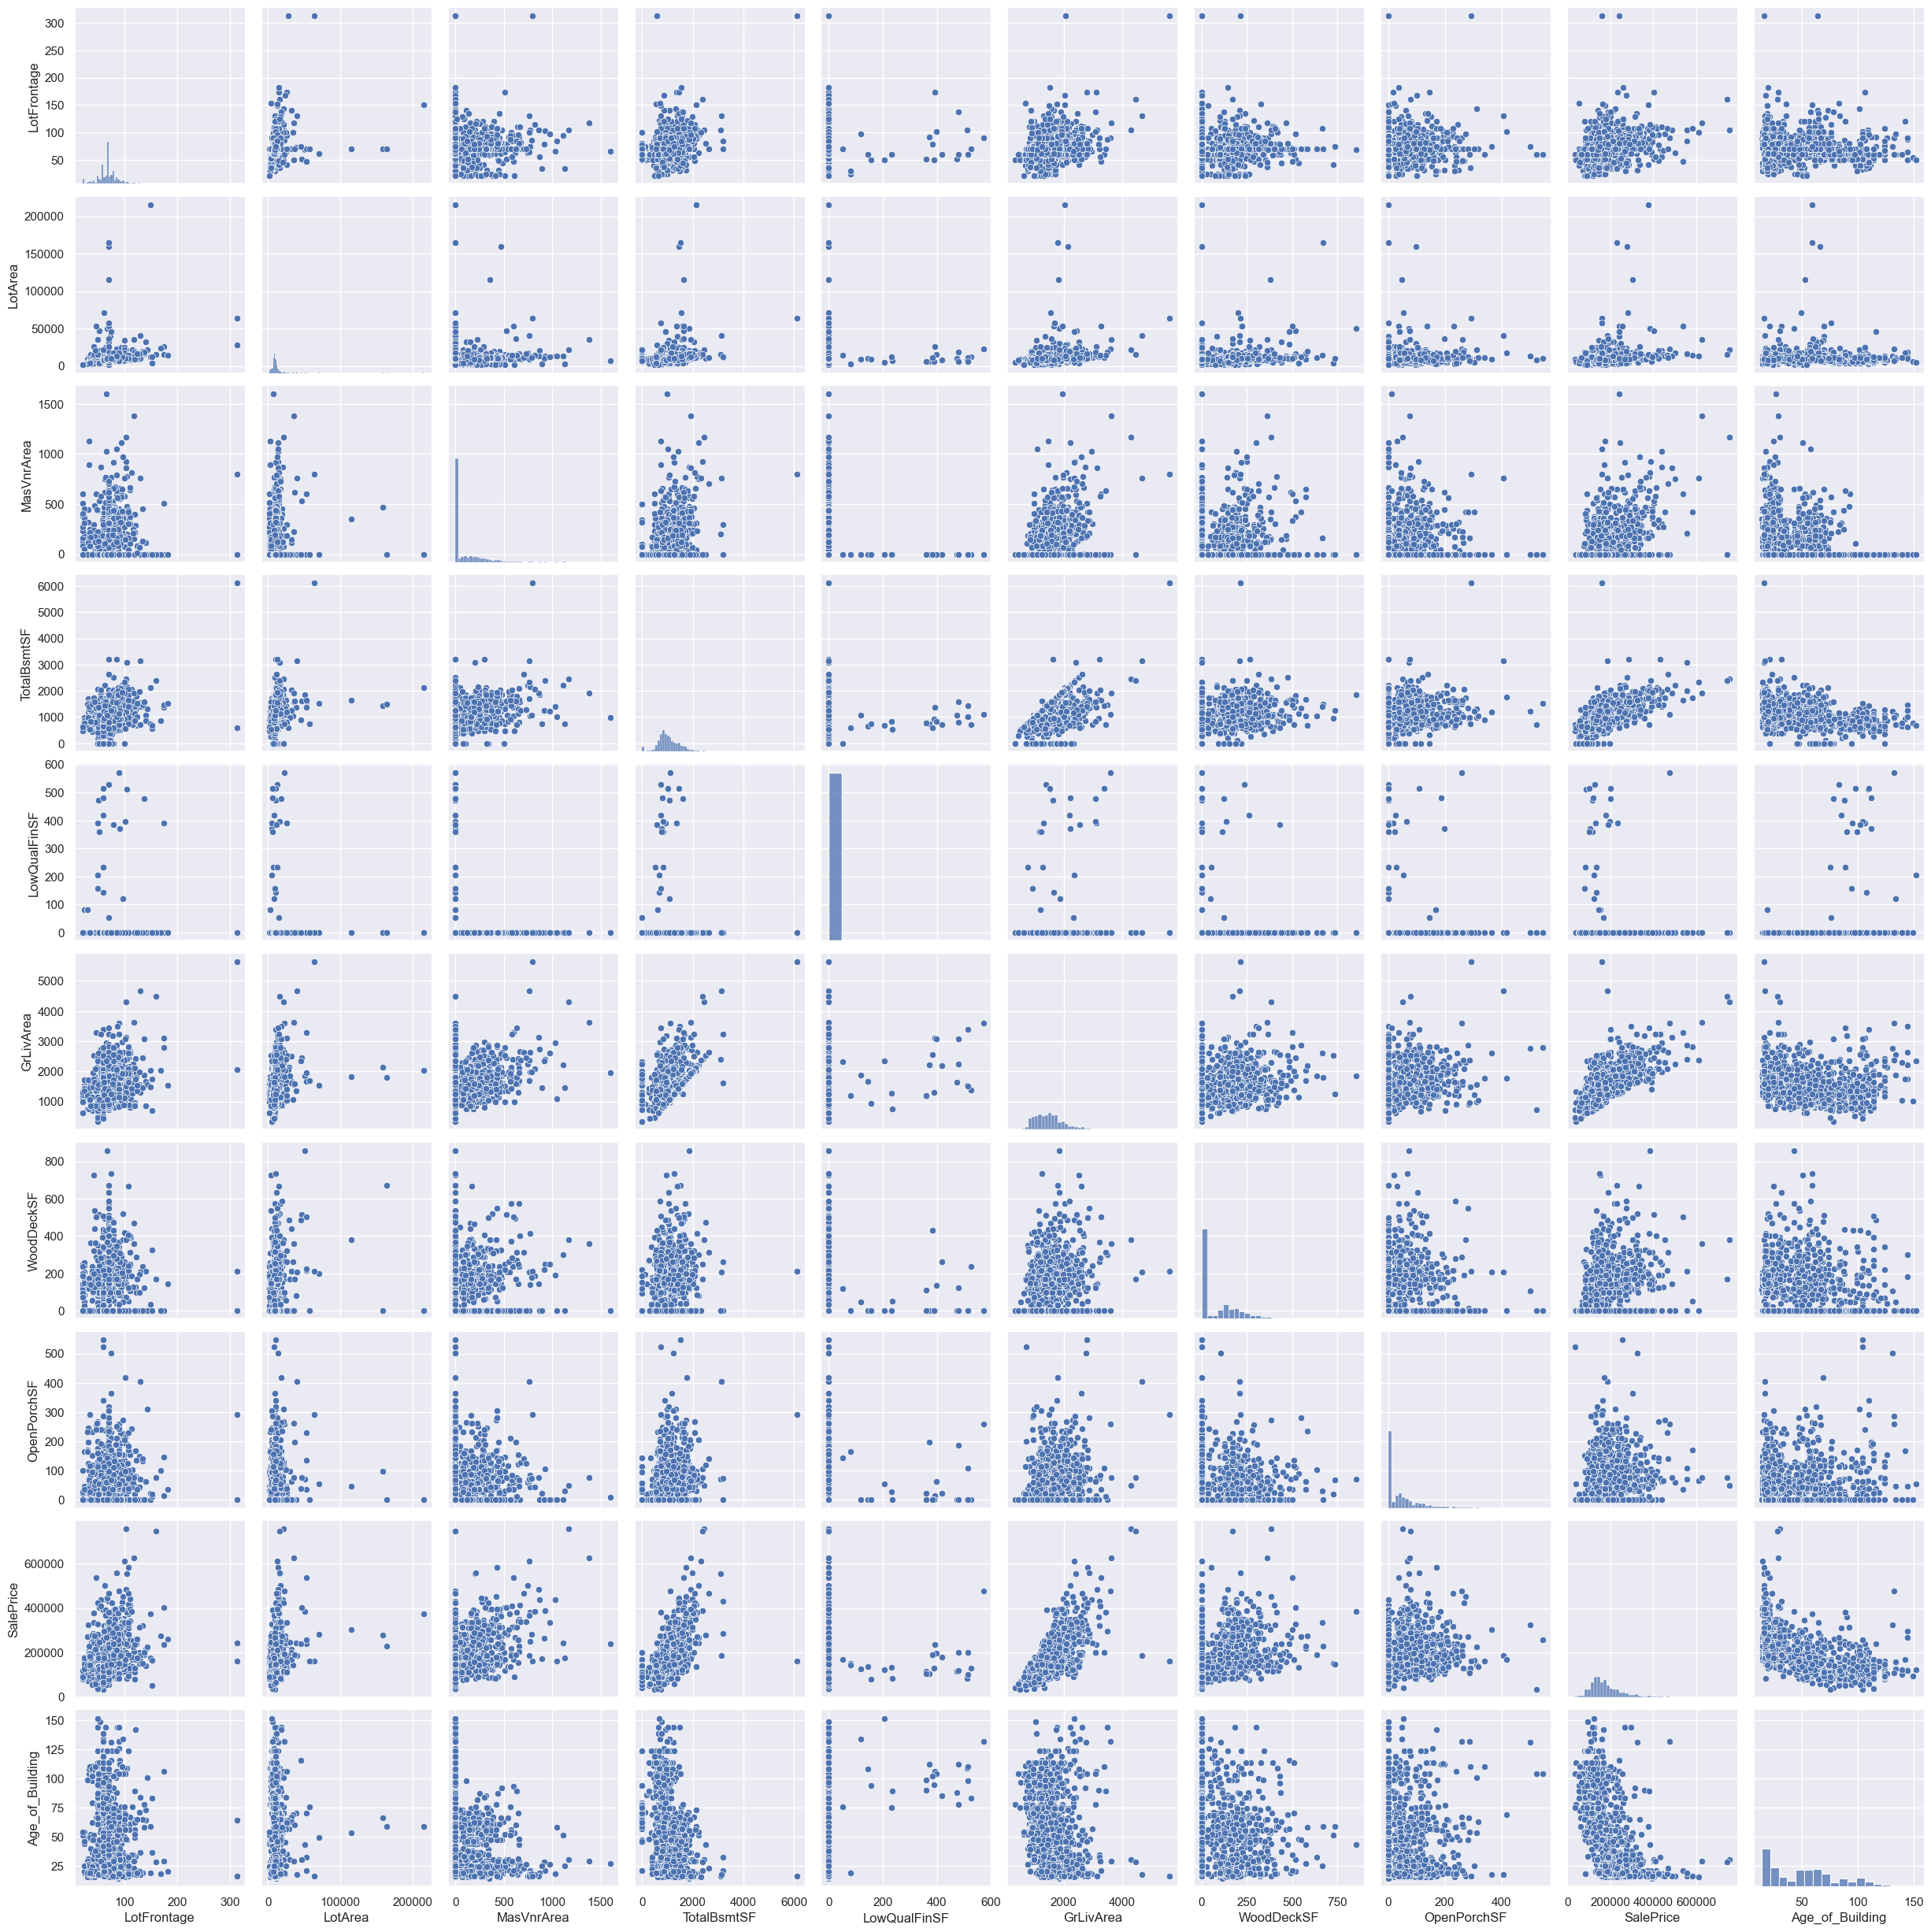

In [762]:
# Bivariate Analysis on Numerical Columns

# From above visualization, we will be removing variables which are highly correlated among each other to have a better visualization

new_num_cols = ['LotFrontage',  'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']

variables = new_num_cols + target_variable + ['Age_of_Building']
sns.pairplot(new_df, vars=variables)

This pair plots depicts the inslights that we drew earlier. 

GrLivArea is linearly correlated with SalePrice.
MasVnrArea is positively correlated with SalePrice.
OpenPorchSF is positively correlated with SalePrice.

There is a positive correlation between GrLivArea and TotalBsmntSF

# Step3: Data Preparation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

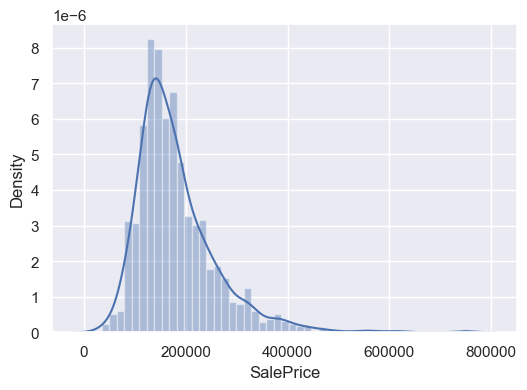

In [763]:
# Taking a look at Target Variable

sns.distplot(new_df["SalePrice"])

Since SalePrice is right-skewed, we will apply log transformation on the same

In [764]:
def log_transformation(col):
    """" Function to perform log transformation on variables """
    
    print(f"Column to transform {col}")
    new_df[col] = np.log(new_df[col])
    

In [765]:
log_transformation('SalePrice')

Column to transform SalePrice


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

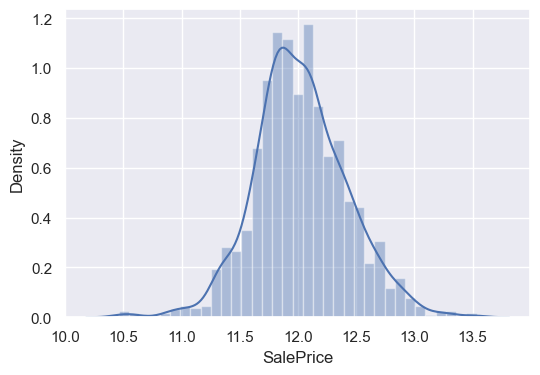

In [766]:
sns.distplot(new_df["SalePrice"])

The data seems to be normally distributed now.

We will transform categorical columns to fit to the model

In [767]:
new_df.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL    65.000000     8450   Pave      Reg         Lvl   
1          20       RL    80.000000     9600   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace  196.000000        Gd        TA      PConc       Gd   
1     MetalSd       None    0.000000        TA        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtHalfBath  FullBath  HalfBath  \
0       854             0       1710             0         2         1   
1         0             0       1262             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   

   Fireplaces    FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0  Not Available     Attchd          RFn           2         548   
1           1             TA     Attchd          RFn           2         460   

  GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF SaleType  \
0         TA         TA          Y           0           61       WD   
1         TA         TA          Y         298            0       WD   

  SaleCondition  SalePrice  Age_of_Building  
0        Normal  12.247694               21  
1        Normal  12.109011               48

In [768]:
# Encoding of Categorical Columns 
# #drop column to accomodate the level of each categorical columns

new_df = pd.get_dummies(new_df, drop_first=True) 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 239 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(24), uint8(212)
memory usage: 610.4 KB


In [769]:
new_df.head(3)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60    65.000000     8450            7            5  196.000000   
1          20    80.000000     9600            6            8    0.000000   
2          60    68.000000    11250            7            5  162.000000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   

   LowQualFinSF  GrLivArea  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0             0       1710             0         2         1             3   
1             0       1262             1         2         0             3   
2             0       1786             0         2         1             3   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   

   OpenPorchSF  SalePrice  Age_of_Building  MSZoning_FV  MSZoning_RH  \
0           61  12.247694               21            0            0   
1            0  12.109011               48            0            0   
2           42  12.317167               23            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0      

In [770]:
new_num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [771]:
# Checking  Datatypes

new_df.dtypes

MSSubClass                     int64
LotFrontage                  float64
LotArea                        int64
OverallQual                    int64
OverallCond                    int64
MasVnrArea                   float64
BsmtFinSF1                     int64
BsmtFinSF2                     int64
BsmtUnfSF                      int64
TotalBsmtSF                    int64
1stFlrSF                       int64
2ndFlrSF                       int64
LowQualFinSF                   int64
GrLivArea                      int64
BsmtHalfBath                   int64
FullBath                       int64
HalfBath                       int64
BedroomAbvGr                   int64
KitchenAbvGr                   int64
TotRmsAbvGrd                   int64
Fireplaces                     int64
GarageCars                     int64
GarageArea                     int64
WoodDeckSF                     int64
OpenPorchSF                    int64
SalePrice                    float64
Age_of_Building                int64
M

# Step4: Model Building and applying Regression techniques 

In [772]:
from sklearn.model_selection import train_test_split

# Specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(new_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [773]:
# Checking shape of train and test dataset

print(f"Train dataset shape {df_train.shape}")
print(f"Test dataset shape {df_test.shape}")

Train dataset shape (1021, 239)
Test dataset shape (438, 239)


### Feature Scaling

In [774]:
# Standard Scaler to rescale numerical features only

scaler = StandardScaler()



columns_to_scale = new_num_cols + misc_columns
new_df[columns_to_scale].head(2)


df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])

In [775]:
# Defining X and Y variables to be used in the model

y_train = df_train.pop('SalePrice')
X_train = df_train

In [776]:
# Checking the shape of X_train and y_train

print(X_train.shape)
print(y_train.shape)

(1021, 238)
(1021,)


In [777]:
# Checking Nulls. If present then it might cause issue in building model

df_train.isnull().sum()
df1 = df_train[df_train.isna().any(axis=1)]
df1

Empty DataFrame
Columns: [MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, Age_of_Building, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, BldgType_2fmCon, BldgType_Duplex, BldgType_Twnhs, BldgType_TwnhsE, HouseStyle_1.5Unf, HouseStyle_1Story, HouseStyle_2.5Fin, HouseStyle_2.5Unf, HouseStyle_2Story, HouseStyle_SFoyer, HouseStyle_SLvl, RoofStyle_Gable, RoofStyle_Gambrel, RoofStyle_Hip, RoofStyle_Mansard, RoofStyle_Shed, RoofMatl_CompShg, ...]
Index: []

### Building Linear Regression Model

In [778]:
# Building a Linear Regression Model First

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [779]:
y_pred = reg.predict(X_train)

# Prediction on the basis of Model
r2_score(y_train, y_pred)

0.9566075224091336

In [780]:
# Lets test the same on Test data 

df_test[columns_to_scale] = scaler.fit_transform(df_test[columns_to_scale])

# Defining X and Y variables to be used in the model

y_test = df_test.pop('SalePrice')
X_test = df_test

# Checking the shape of X_test and y_test

print(X_test.shape)
print(y_test.shape)

(438, 238)
(438,)


In [781]:
y_pred_test = reg.predict(X_test)

# Prediction on the basis of Model
r2_score(y_test, y_pred_test)

0.8581464034460842

R2 score of test data is not so bad, we will perform more analysis and try different methods

### Performing Regression

In [782]:
# Ridge Regression

print(X_train.shape)
print(y_train.shape)

(1021, 238)
(1021,)


### Starting Regularization
#### Ridge Regression

In [783]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, 
                        params, 
                        scoring='neg_mean_squared_error',
                        cv=5,
                        return_train_score=True,
                        verbose = 1)


Ridge_reg.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [784]:
# summarize result

dir(Ridge_reg)
print('Best Score: %s' % Ridge_reg.best_score_)
result = pd.DataFrame(Ridge_reg.cv_results_)
result.head()

Best Score: -0.02338125785360612


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.035230      0.029290         0.004563        0.001026    0.000100   
1       0.020274      0.008242         0.003236        0.000780    0.001000   
2       0.010262      0.002035         0.003491        0.001188    0.010000   
3       0.011432      0.001755         0.004911        0.000871    0.050000   
4       0.027460      0.033030         0.004653        0.001078    0.100000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.016891          -0.054810          -0.031694   
1   {'alpha': 0.001}          -0.016863          -0.054792          -0.031540   
2    {'alpha': 0.01}          -0.016833          -0.054621          -0.030527   
3    {'alpha': 0.05}          -0.017730          -0.053925          -0.029513   
4     {'alpha': 0.1}          -0.018441          -0.053155          -0.029320   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.060588          -0.013838        -0.035564        0.019143   
1          -0.058806          -0.013792        -0.035159        0.018703   
2          -0.045394          -0.013689        -0.032213        0.015864   
3          -0.024386          -0.014843        -0.028079        0.013900   
4          -0.018433          -0.015846        -0.027039        0.013860   

   rank_test_score  split0_train_score  split1_train_score  \
0               28           -0.005769           -0.006107   
1               27           -0.005771           -0.006107   
2               26           -0.005907           -0.006109   
3               23           -0.006832           -0.006142   
4               22           -0.007553           -0.006207   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.006349           -0.006747           -0.006369   
1           -0.006351           -0.006748           -0.006371   
2           -0.006472           -0.006847           -0.006510   
3           -0.007283           -0.007650           -0.007453   
4           -0.007904           -0.008377           -0.008182   

   mean_train_score  std_train_score  
0         -0.006268         0.000323  
1         -0.006270         0.000323  
2         -0.006369         0.000329  
3         -0.007072         0.000538  
4         -0.007644         0.000770

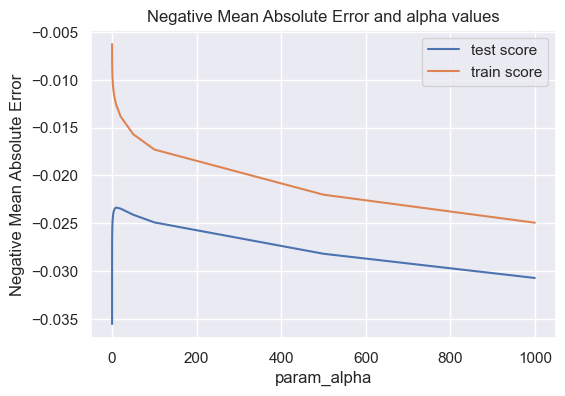

In [785]:
# plotting cv results
result['param_alpha'] = result['param_alpha'].astype('float32')

plt.plot(result["param_alpha"], result["mean_test_score"])
plt.plot(result["param_alpha"], result["mean_train_score"])
plt.xlabel('param_alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha values")
plt.legend(['test score', 'train score'], loc='upper right')

At alpha=10, we notice that model stablises neg_mean_squared_error and hence we choose this value

In [786]:
#Printing Coefficients

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.50596020e-04, -1.47124800e-02,  1.85772506e-02,  5.78613855e-02,
        4.12895519e-02, -2.29222749e-03,  2.32575489e-05,  8.91385054e-05,
        8.45416944e-06,  2.63340905e-07,  2.16041815e-04,  2.10552840e-04,
        6.13181694e-03,  5.56427130e-04, -3.40928703e-03,  1.46747125e-02,
        1.18745105e-02,  1.22501705e-02, -1.25859998e-02,  1.87963640e-02,
       -1.53693419e-03,  4.65250099e-02,  1.81558803e-05,  9.86415581e-03,
       -7.11461676e-04, -1.18192490e-03,  5.20387436e-02,  4.62871880e-02,
        6.29113463e-02,  1.54728047e-02,  2.76209446e-02,  1.81667966e-02,
       -5.07262839e-02,  4.66210996e-03,  3.98110121e-02,  4.65307264e-02,
        5.21282089e-02, -1.42392341e-02,  3.16844587e-02, -4.46909451e-02,
       -6.68569813e-03, -1.43107726e-02,  2.98116033e-02, -3.80997611e-03,
       -1.99789874e-03, -3.26577890e-02,  1.41214687e-02,  6.16676014e-02,
       -1.71663291e-02,  1.12412727e-01, -7.55016606e-02, -2.22464061e-02,
       -6.67241640e-02, -

In [787]:
ridge_coeff = {}
for i,col in enumerate(X_train):    
    ridge_coeff[col] = ridge.coef_[i]

ridge_final_coefficient = pd.DataFrame(list(ridge_coeff.items()), columns=['Features', 'Ridge Coefficients with alpha=10'])
ridge_final_coefficient.sort_values(by='Ridge Coefficients with alpha=10', ascending=False)


Features  Ridge Coefficients with alpha=10
49        Neighborhood_Crawfor                          0.112413
59        Neighborhood_NridgHt                          0.083567
64        Neighborhood_Somerst                          0.069166
28                 MSZoning_RL                          0.062911
227             SaleType_ConLD                          0.062046
47        Neighborhood_ClearCr                          0.061668
69             Condition1_Norm                          0.061532
65        Neighborhood_StoneBr                          0.060217
3                  OverallQual                          0.057861
159            BsmtExposure_Gd                          0.054428
184               CentralAir_Y                          0.053777
36             LandContour_Lvl                          0.052128
26                 MSZoning_FV                          0.052039
105           RoofMatl_WdShngl                          0.050308
108        Exterior1st_BrkFace                          0.049749
236       SaleCondition_Normal                          0.047968
35             LandContour_Low                          0.046531
21                  GarageCars                          0.046525
27                 MSZoning_RH                          0.046287
99            RoofMatl_CompShg                          0.042981
58        Neighborhood_NoRidge                          0.042319
176               Heating_GasW                          0.041296
4                  OverallCond                          0.041290
77             Condition2_Norm                          0.040490
147           Foundation_PConc                          0.040362
34             LandContour_HLS                          0.039811
214              GarageQual_Gd                          0.037751
237      SaleCondition_Partial                          0.037392
230               SaleType_New                          0.037392
198             Functional_Typ                          0.035198
67        Neighborhood_Veenker                          0.034945
223               PavedDrive_P                          0.032078
38           LotConfig_CulDSac                          0.031684
164           BsmtFinType1_GLQ                          0.029958
42               LandSlope_Mod                          0.029812
140               ExterQual_Gd                          0.029405
70             Condition1_PosA                          0.029133
30                 Street_Pave                          0.027621
83             BldgType_2fmCon                          0.027291
73             Condition1_RRAn                          0.026924
146          Foundation_CBlock                          0.024743
84             BldgType_Duplex                          0.023509
155                BsmtCond_Gd                          0.022389
117        Exterior1st_VinylSd                          0.022153
78             Condition2_PosA                          0.022144
76            Condition2_Feedr                          0.021330
174           BsmtFinType2_Unf                          0.021000
204          GarageType_Attchd                          0.020085
195            Functional_Min2                          0.019509
61          Neighborhood_SWISU                          0.019103
19                TotRmsAbvGrd                          0.018796
185           Electrical_FuseF                          0.018746
2                      LotArea                          0.018577
31                LotShape_IR2                          0.018167
122        Exterior2nd_BrkFace                          0.017621
132        Exterior2nd_VinylSd                          0.017517
158                BsmtCond_TA                          0.017164
226               SaleType_Con                          0.016171
97           RoofStyle_Mansard                          0.015940
127        Exterior2nd_MetalSd                          0.015581
149           Foundation_Stone                          0

### Lasso Regression

In [788]:
from sklearn.model_selection import GridSearchCV


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# define the model/ estimator
model = Lasso()

# define the grid search
Lasso_reg= GridSearchCV(model, 
                        params, 
                        scoring='neg_mean_squared_error',
                        cv=5,
                        return_train_score=True,
                        verbose = 1)


Lasso_reg.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [789]:
# summarize result

dir(Lasso_reg)
print('Best Score: %s' % Lasso_reg.best_score_)
result = pd.DataFrame(Lasso_reg.cv_results_)
result.head()

Best Score: -0.024597474571218587


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.145134      0.082133         0.003375        0.000708    0.000100   
1       0.019987      0.003020         0.003211        0.000613    0.001000   
2       0.012105      0.000849         0.002716        0.000439    0.010000   
3       0.008932      0.001392         0.002599        0.000221    0.050000   
4       0.007041      0.000366         0.003419        0.000934    0.100000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.016438          -0.052595          -0.026659   
1   {'alpha': 0.001}          -0.016415          -0.051085          -0.026541   
2    {'alpha': 0.01}          -0.018294          -0.059389          -0.031919   
3    {'alpha': 0.05}          -0.021797          -0.071581          -0.039314   
4     {'alpha': 0.1}          -0.028337          -0.081859          -0.047724   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.024511          -0.012806        -0.026602        0.013955   
1          -0.011691          -0.017256        -0.024597        0.014091   
2          -0.015855          -0.019697        -0.029031        0.016161   
3          -0.022399          -0.024002        -0.035819        0.019013   
4          -0.028923          -0.030521        -0.043473        0.020494   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.007454           -0.006698   
1                1           -0.015189           -0.010843   
2                3           -0.026195           -0.019036   
3                4           -0.033094           -0.025042   
4                5           -0.041504           -0.030695   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.007916           -0.008000           -0.008098   
1           -0.013825           -0.016303           -0.015520   
2           -0.023296           -0.027022           -0.026158   
3           -0.029693           -0.033779           -0.032557   
4           -0.036646           -0.041354           -0.041110   

   mean_train_score  std_train_score  
0         -0.007633         0.000517  
1         -0.014336         0.001921  
2         -0.024342         0.002938  
3         -0.030833         0.003212  
4         -0.038262         0.004196

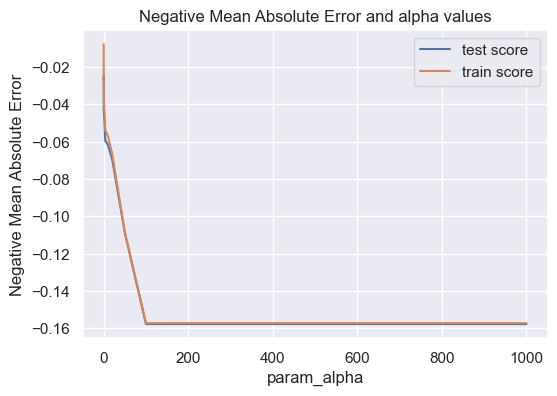

In [790]:
# plotting cv results
result['param_alpha'] = result['param_alpha'].astype('float32')

plt.plot(result["param_alpha"], result["mean_test_score"])
plt.plot(result["param_alpha"], result["mean_train_score"])
plt.xlabel('param_alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha values")
plt.legend(['test score', 'train score'], loc='upper right')

Since, we have taken neg_mean_squared_error, hence will choose the best parameter which stablises the model based on the highest neg_mean_squared_error which is 0.001 in this case and see the model`s score

In [791]:
alpha = 0.001
lasso_1 = Lasso(alpha=alpha)

lasso_1.fit(X_train, y_train)

Lasso(alpha=0.001)

In [792]:
lasso_1.coef_

array([-4.83825823e-04, -1.40359103e-02,  1.87296650e-02,  6.27346317e-02,
        4.70223210e-02, -0.00000000e+00,  5.32362227e-05,  1.12286908e-04,
        3.59443241e-05,  0.00000000e+00,  2.18977636e-04,  2.09220163e-04,
        5.63374347e-03,  0.00000000e+00, -2.44811223e-03,  1.05681202e-02,
        9.84923234e-03,  7.33558862e-03, -9.57185436e-03,  1.86058098e-02,
        0.00000000e+00,  4.59939421e-02,  2.48839514e-05,  1.00978795e-02,
       -0.00000000e+00, -1.85612265e-03,  1.32636058e-04,  0.00000000e+00,
        4.74614387e-02, -5.93282984e-03,  0.00000000e+00,  0.00000000e+00,
       -1.88700775e-02,  0.00000000e+00,  0.00000000e+00,  6.84273455e-03,
        1.46133874e-02, -0.00000000e+00,  2.90630905e-02, -4.10119846e-04,
       -0.00000000e+00, -2.50131151e-03,  5.89446040e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  5.67127826e-02,
       -0.00000000e+00,  1.25552345e-01, -6.11937426e-02, -0.00000000e+00,
       -5.04860624e-02, -

In [793]:
lasso_coeff = {}
for i,col in enumerate(X_train):    
    lasso_coeff[col] = lasso_1.coef_[i]

lasso_final_coefficient = pd.DataFrame(list(lasso_coeff.items()), columns=['Features', 'Lasso Coefficients'])
lasso_final_coefficient.sort_values(by='Lasso Coefficients', ascending=False)


Features  Lasso Coefficients
49        Neighborhood_Crawfor            0.125552
64        Neighborhood_Somerst            0.098796
59        Neighborhood_NridgHt            0.091023
3                  OverallQual            0.062735
69             Condition1_Norm            0.061825
159            BsmtExposure_Gd            0.061396
47        Neighborhood_ClearCr            0.056713
108        Exterior1st_BrkFace            0.050629
28                 MSZoning_RL            0.047461
4                  OverallCond            0.047022
21                  GarageCars            0.045994
184               CentralAir_Y            0.042280
236       SaleCondition_Normal            0.032476
164           BsmtFinType1_GLQ            0.032441
174           BsmtFinType2_Unf            0.030405
38           LotConfig_CulDSac            0.029063
147           Foundation_PConc            0.026465
237      SaleCondition_Partial            0.026199
58        Neighborhood_NoRidge            0.025925
65        Neighborhood_StoneBr            0.025516
230               SaleType_New            0.024874
132        Exterior2nd_VinylSd            0.021227
198             Functional_Typ            0.020324
2                      LotArea            0.018730
19                TotRmsAbvGrd            0.018606
140               ExterQual_Gd            0.018449
204          GarageType_Attchd            0.017247
113        Exterior1st_MetalSd            0.015665
36             LandContour_Lvl            0.014613
15                    FullBath            0.010568
23                  WoodDeckSF            0.010098
16                    HalfBath            0.009849
17                BedroomAbvGr            0.007336
35             LandContour_Low            0.006843
42               LandSlope_Mod            0.005894
12                LowQualFinSF            0.005634
189           Electrical_SBrkr            0.005451
158                BsmtCond_TA            0.004898
163           BsmtFinType1_BLQ            0.002834
200             FireplaceQu_Gd            0.001263
127        Exterior2nd_MetalSd            0.000648
10                    1stFlrSF            0.000219
11                    2ndFlrSF            0.000209
26                 MSZoning_FV            0.000133
7                   BsmtFinSF2            0.000112
6                   BsmtFinSF1            0.000053
8                    BsmtUnfSF            0.000036
22                  GarageArea            0.000025
157                BsmtCond_Po            0.000000
175               Heating_GasA           -0.000000
156             BsmtCond_OTHER           -0.000000
172         BsmtFinType2_OTHER           -0.000000
160            BsmtExposure_Mn            0.000000
166         BsmtFinType1_OTHER           -0.000000
169           BsmtFinType2_BLQ           -0.000000
170           BsmtFinType2_GLQ            0.000000
173           BsmtFinType2_Rec           -0.000000
171           BsmtFinType2_LwQ           -0.000000
235       SaleCondition_Family            0.000000
149           Foundation_Stone            0.000000
155                BsmtCond_Gd            0.000000
153             BsmtQual_OTHER           -0.000000
129        Exterior2nd_Plywood            0.000000
130          Exterior2nd_Stone            0.000000
131         Exterior2nd_Stucco           -0.000000
133        Exterior2nd_Wd Sdng           -0.000000
134        Exterior2nd_Wd Shng           -0.000000
135         MasVnrType_BrkFace            0.000000
136            MasVnrType_None            0.000000
137           MasVnrType_OTHER            0.000000
138           MasVnrType_Stone           -0.000000
139               ExterQual_Fa           -0.000000
141               ExterQual_TA           -0.000000
142               ExterCond_Fa           -0.000000
144               ExterCond_Po            0.000000
145               ExterCond_TA            0.000000
146          Foundation_CBlock            0.000000
148            Foundation_Slab           -0.

In [794]:
# Printing Scores

print(lasso_1.score(X_train, y_train))
print(lasso_1.score(X_test, y_test))

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9001006821647615
0.8860911955755145
0.9154058210206814
0.8890313859356339


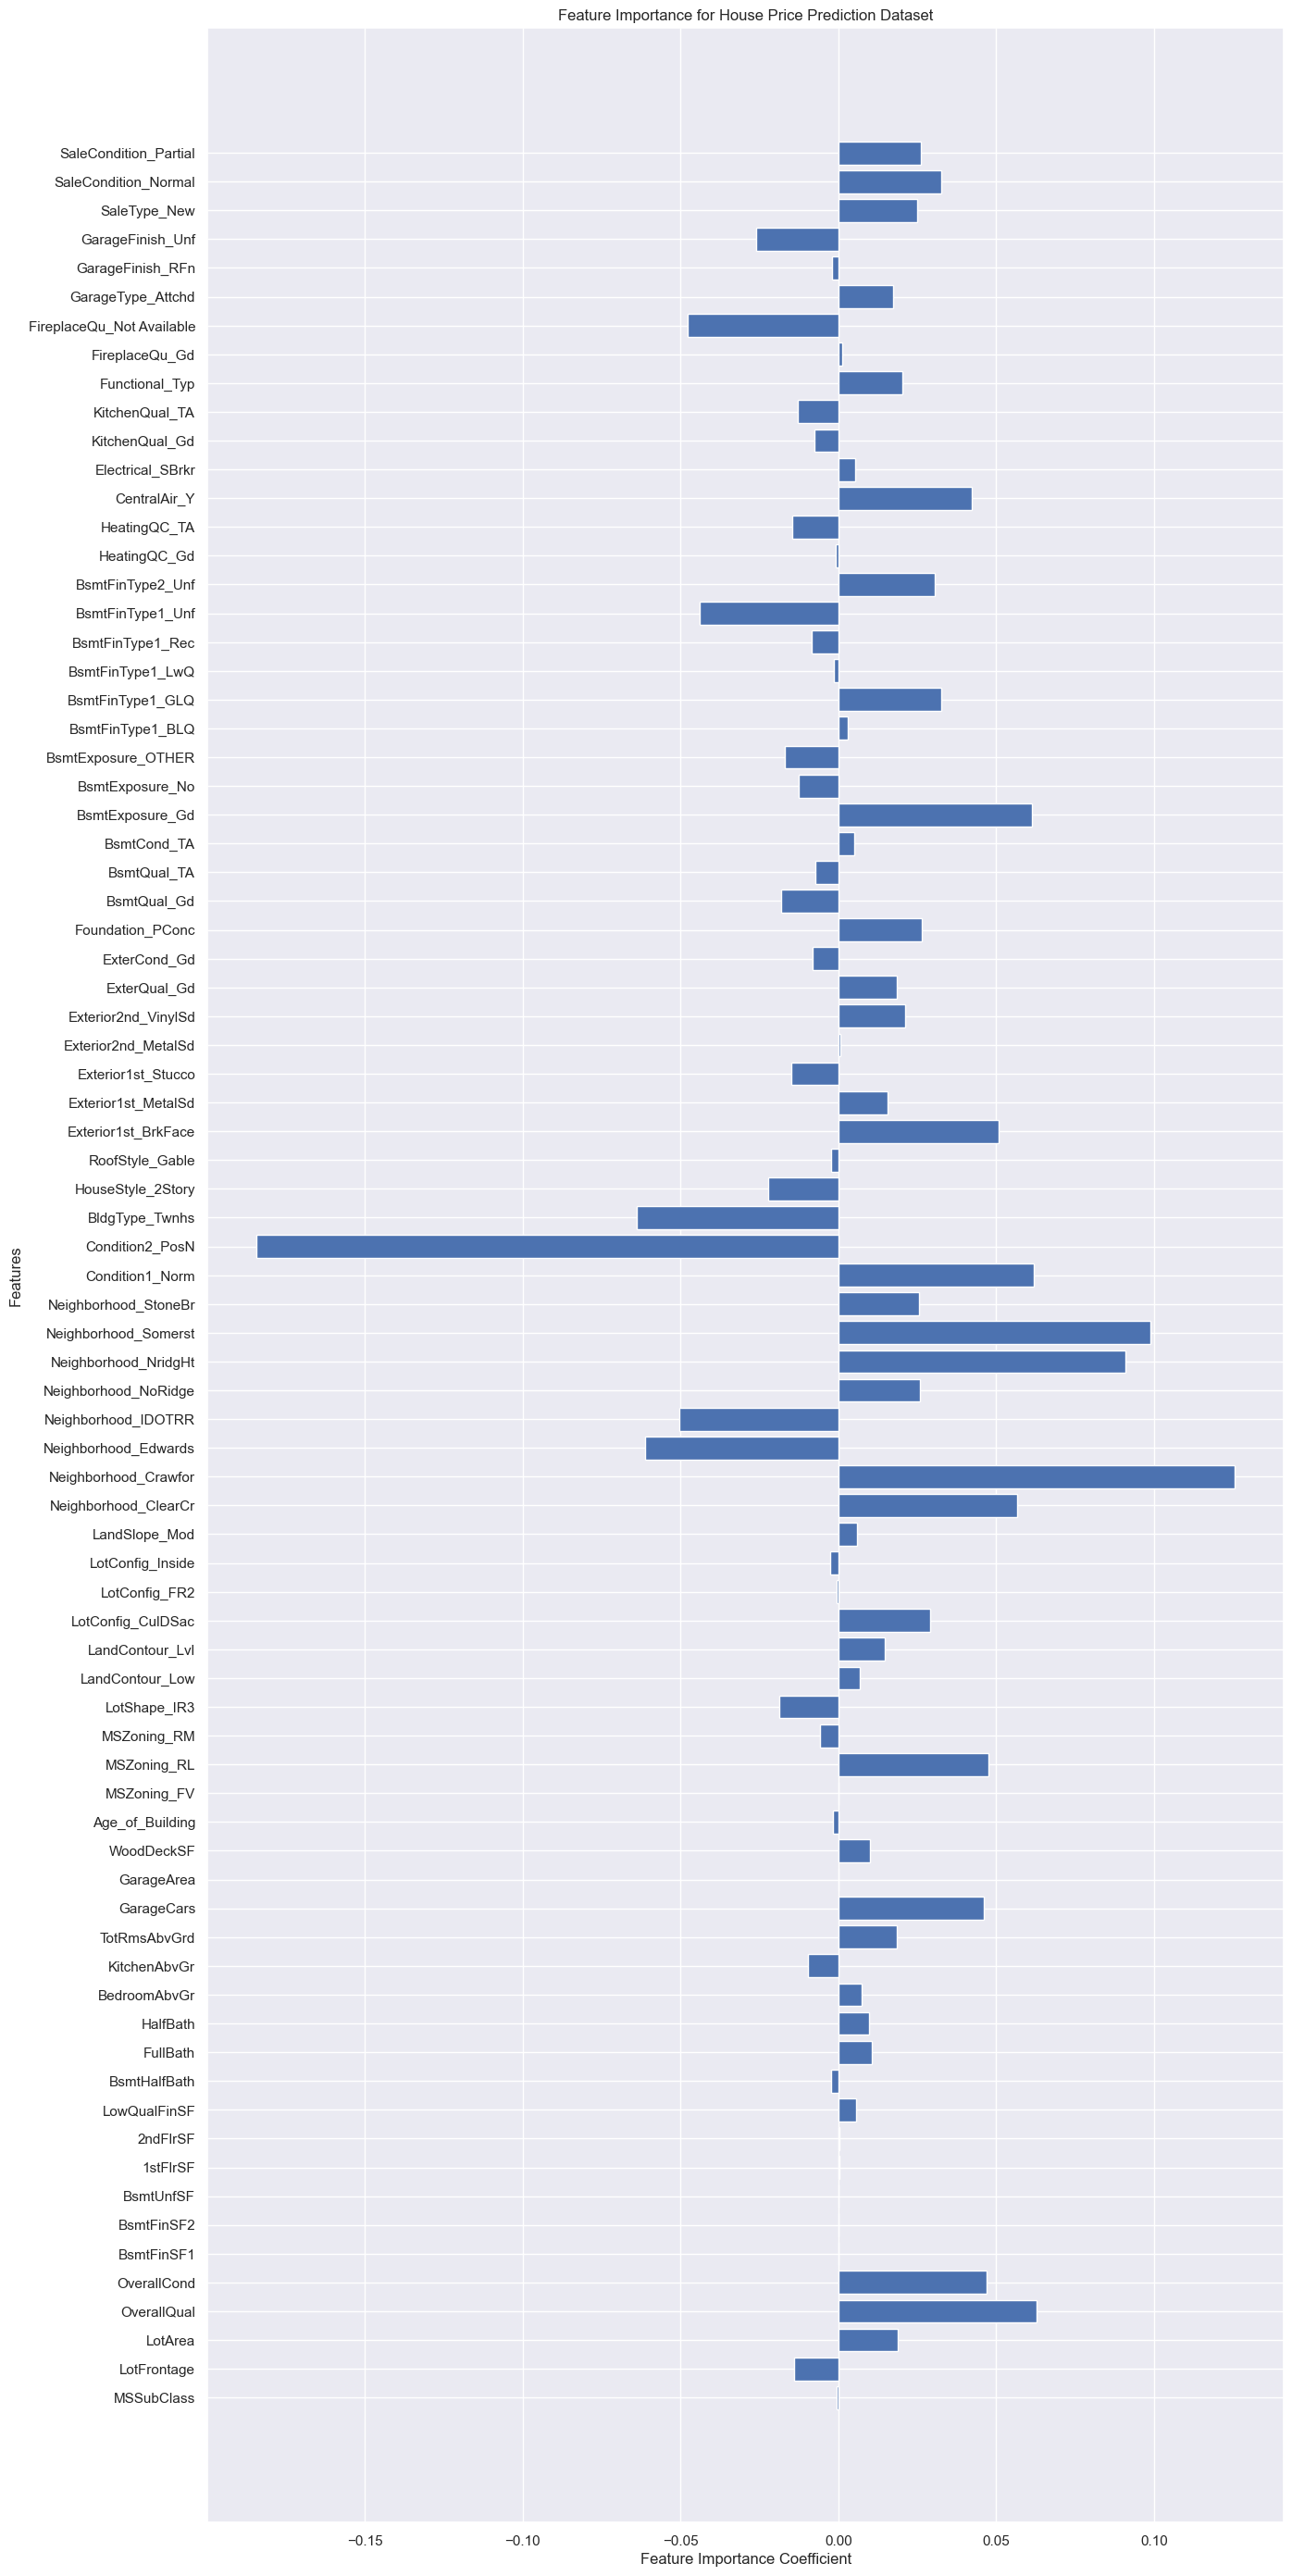

In [802]:
# plot the feature importance of Linear Regression Model

df_1 = lasso_final_coefficient[lasso_final_coefficient['Lasso Coefficients'] != 0]


plt.figure(figsize=(15, 35))
plt.barh(df_1['Features'], df_1['Lasso Coefficients'])
plt.xlabel("Feature Importance Coefficient")
plt.ylabel("Features")
plt.title("Feature Importance for House Price Prediction Dataset")
plt.show()

From the Model, we conclude that prices houses which are located in better proximity / neighbourhood e.g Crawford , Somerst, NridgHt are mostly expensive to buy. Also if the overall Quality of the house is good with Normal Conditions will have more Selling Price.

In addition, if the Condition2 of the house is normal and is located in  Townhouse then those houses would have lesser Selling Price

There isnt much difference in Ridge and Lasso Scores. Ridge seems to be performing slightly better than Lasso.
However, given the number of  variables, we will choose Lasso as it reduces the parameters.